# PROJECT: TTC Delays Data Analysis

**1. Exploratory Data Analysis**

In [125]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime as dt


In [126]:
ttc = pd.read_csv('TTC_Delays_Data.csv')

In [127]:
ttc.head()

Date   Time     Day                Station   Code  Min Delay  \
0  2018-01-01  00:29  Monday  SHEPPARD WEST STATION  MUATC         10   
1  2018-01-01  01:07  Monday         DUNDAS STATION  MUNCA          0   
2  2018-01-01  01:22  Monday         MUSEUM STATION   MUSC          0   
3  2018-01-01  01:28  Monday              BAY LOWER   EUOE          0   
4  2018-01-01  01:39  Monday         MUSEUM STATION    MUO          6   

   Min Gap Bound Line  Vehicle             Delay Description  
0       15     N   YU     5986                   ATC Project  
1        0   NaN   YU        0                           NaN  
2        0     N   YU     5751   Miscellaneous Speed Control  
3        0   NaN   BD     5222  Rail Cars & Shops Opr. Error  
4       11     S   YU     5781           Miscellaneous Other

**Data Types**

This data set contains only 3 numeric/integer attributes/columns and the rest are categorical/object data type.


In [128]:
ttc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100557 entries, 0 to 100556
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               100557 non-null  object
 1   Time               100557 non-null  object
 2   Day                100557 non-null  object
 3   Station            100557 non-null  object
 4   Code               100557 non-null  object
 5   Min Delay          100557 non-null  int64 
 6   Min Gap            100557 non-null  int64 
 7   Bound              74526 non-null   object
 8   Line               100245 non-null  object
 9   Vehicle            100557 non-null  int64 
 10  Delay Description  98450 non-null   object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


**Statistical Summary of Numeric Features**

In [129]:
ttc.describe()

Min Delay        Min Gap        Vehicle
count  100557.000000  100557.000000  100557.000000
mean        2.961117       4.387333    3660.059141
std         9.885668      10.568070    2609.273727
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000    5193.000000
75%         4.000000       8.000000    5666.000000
max       515.000000     519.000000   69021.000000

**DATA TYPES EDIT:**

Convert Columns Date, Time, Day to datetime type instead of object for time series analysis

In [130]:
ttc['Date']=pd.to_datetime(ttc['Date'])
ttc['Time']=pd.to_datetime(ttc['Time'])

In [131]:
ttc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100557 entries, 0 to 100556
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               100557 non-null  datetime64[ns]
 1   Time               100557 non-null  datetime64[ns]
 2   Day                100557 non-null  object        
 3   Station            100557 non-null  object        
 4   Code               100557 non-null  object        
 5   Min Delay          100557 non-null  int64         
 6   Min Gap            100557 non-null  int64         
 7   Bound              74526 non-null   object        
 8   Line               100245 non-null  object        
 9   Vehicle            100557 non-null  int64         
 10  Delay Description  98450 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 8.4+ MB


Create a copy of ttc dataframe to use for time series analysis/modeling
Create additional features/columns for Year, Month


In [132]:
ttc_timeseries = ttc.copy()
ttc_timeseries['Year']=ttc_timeseries['Date'].dt.year
ttc_timeseries['Month']=ttc_timeseries['Date'].dt.month
ttc_timeseries['Days']=ttc_timeseries['Date'].dt.day
ttc_timeseries

Date                Time        Day                Station  \
0      2018-01-01 2023-07-18 00:29:00     Monday  SHEPPARD WEST STATION   
1      2018-01-01 2023-07-18 01:07:00     Monday         DUNDAS STATION   
2      2018-01-01 2023-07-18 01:22:00     Monday         MUSEUM STATION   
3      2018-01-01 2023-07-18 01:28:00     Monday              BAY LOWER   
4      2018-01-01 2023-07-18 01:39:00     Monday         MUSEUM STATION   
...           ...                 ...        ...                    ...   
100552 2023-05-31 2023-07-18 00:26:00  Wednesday            BAY STATION   
100553 2023-05-31 2023-07-18 00:28:00  Wednesday         WARDEN STATION   
100554 2023-05-31 2023-07-18 01:02:00  Wednesday      ST ANDREW STATION   
100555 2023-05-31 2023-07-18 01:27:00  Wednesday            BAY STATION   
100556 2023-05-31 2023-07-18 01:27:00  Wednesday      ST ANDREW STATION   

         Code  Min Delay  Min Gap Bound Line  Vehicle  \
0       MUATC         10       15     N   YU     5986   
1       MUNCA          0        0   NaN   YU        0   
2        MUSC          0        0     N   YU     5751   
3        EUOE          0        0   NaN   BD     5222   
4         MUO          6       11     S   YU     5781   
...       ...        ...      ...   ...  ...      ...   
100552  MUIRS          0        0     W   BD     5058   
100553   SUDP          0        0   NaN   BD        0   
100554   SUDP          0        0     S   YU     5881   
100555  MUIRS          0        0   NaN   BD        0   
100556    SUO          0        0     S   YU     5976   

                                        Delay Description  Year  Month  Days  
0                                             ATC Project  2018      1     1  
1                                                     NaN  2018      1     1  
2                             Miscellaneous Speed Control  2018      1     1  
3                            Rail Cars & Shops Opr. Error  2018      1     1  
4                                     Miscellaneous Other  2018      1     1  
...                                                   ...   ...    ...   ...  
100552  Injured or ill Customer (In Station) - Medical...  2023      5    31  
100553                                  Disorderly Patron  2023      5    31  
100554                                  Disorderly Patron  2023      5    31  
100555  Injured or ill Customer (In Station) - Medical...  2023      5    31  
100556                                    Passenger Other  2023      5    31  

[100557 rows x 14 columns]

In [133]:
ttc_timeseries1to21=ttc_timeseries[ttc_timeseries['Min Delay'].isin(range(1,21))]
ttc_timeseries1to21

Date                Time        Day                Station  \
0      2018-01-01 2023-07-18 00:29:00     Monday  SHEPPARD WEST STATION   
4      2018-01-01 2023-07-18 01:39:00     Monday         MUSEUM STATION   
6      2018-01-01 2023-07-18 02:09:00     Monday        KIPLING STATION   
8      2018-01-01 2023-07-18 02:42:00     Monday        COLLEGE STATION   
10     2018-01-01 2023-07-18 03:06:00     Monday         WARDEN STATION   
...           ...                 ...        ...                    ...   
100530 2023-05-31 2023-07-18 16:34:00  Wednesday      WELLESLEY STATION   
100533 2023-05-31 2023-07-18 17:13:00  Wednesday       YONGE BD STATION   
100534 2023-05-31 2023-07-18 17:28:00  Wednesday       ST CLAIR STATION   
100537 2023-05-31 2023-07-18 18:15:00  Wednesday     VAUGHAN MC STATION   
100542 2023-05-31 2023-07-18 19:58:00  Wednesday      OSSINGTON STATION   

         Code  Min Delay  Min Gap Bound Line  Vehicle  \
0       MUATC         10       15     N   YU     5986   
4         MUO          6       11     S   YU     5781   
6       MUSAN          3        7     E   BD     5261   
8        SUDP          7       12     N   YU     5696   
10        MUI          3        7     E   BD     5257   
...       ...        ...      ...   ...  ...      ...   
100530  MUSAN          3        6     S   YU     5396   
100533   EUDO          6        9     E   BD     5359   
100534  MUPAA          3        6     N   YU     5806   
100537  MUATC          3        6     S   YU     5651   
100542  MUPAA          4        9     W   BD     5250   

                                        Delay Description  Year  Month  Days  
0                                             ATC Project  2018      1     1  
4                                     Miscellaneous Other  2018      1     1  
6                                      Unsanitary Vehicle  2018      1     1  
8                                       Disorderly Patron  2018      1     1  
10       Injured or ill Customer (On Train) - Transported  2018      1     1  
...                                                   ...   ...    ...   ...  
100530                                 Unsanitary Vehicle  2023      5    31  
100533                   Door Problems - Faulty Equipment  2023      5    31  
100534  Passenger Assistance Alarm Activated - No Trou...  2023      5    31  
100537                                        ATC Project  2023      5    31  
100542  Passenger Assistance Alarm Activated - No Trou...  2023      5    31  

[39139 rows x 14 columns]

In [134]:
ttc_timeseries_delays=ttc_timeseries1to21.groupby('Date')['Time'].count()
ttc_timeseries_delays


Date
2018-01-01    24
2018-01-02    23
2018-01-03    28
2018-01-04    16
2018-01-05    29
              ..
2023-05-27    15
2023-05-28    15
2023-05-29    22
2023-05-30    25
2023-05-31    22
Name: Time, Length: 1977, dtype: int64

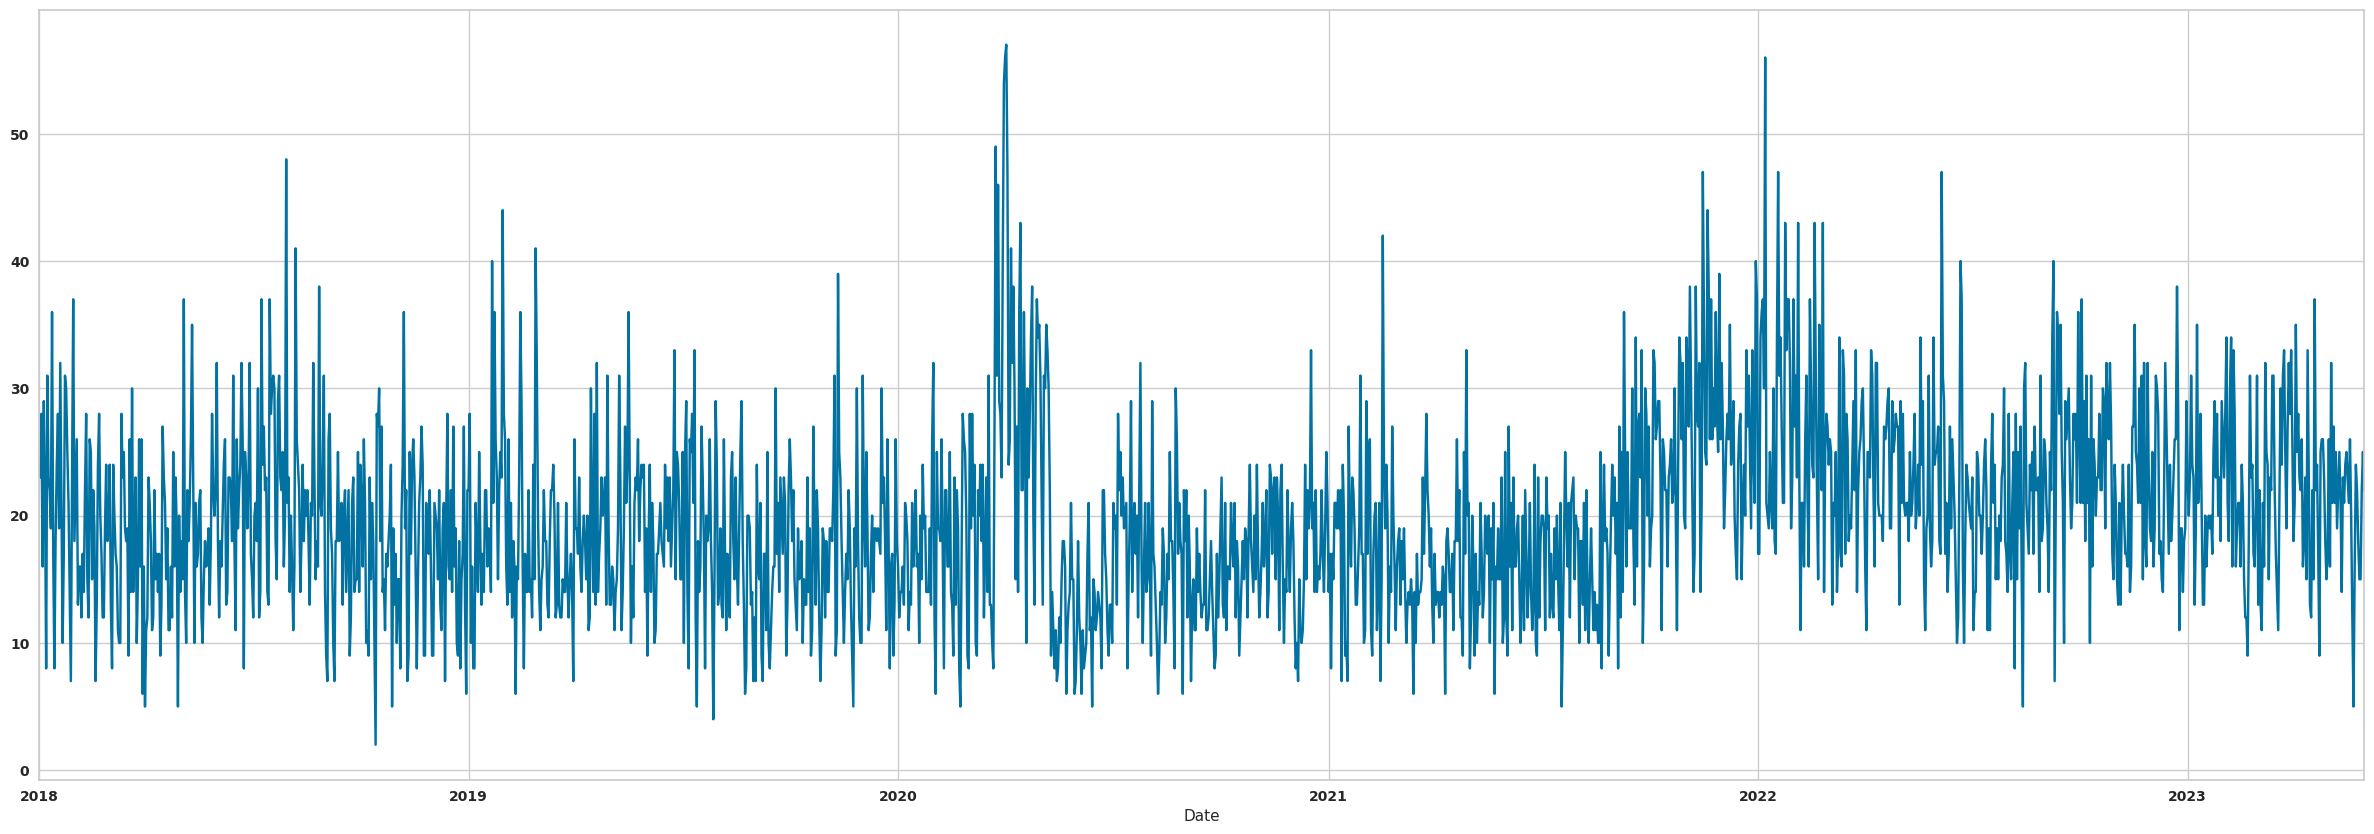

In [135]:
ttc_timeseries_delays.plot(figsize=(30,10));

Convert the Data Series ttc_timeseries_delays to a DataFrame

Rename "Time" column to "Delays" since the values in this column are the count of delays by date

In [136]:
ttc_timeseries_delays=pd.DataFrame(ttc_timeseries_delays)
ttc_timeseries_delays=ttc_timeseries_delays.rename(columns={'Time': 'Delays'})
ttc_timeseries_delays

Delays
Date              
2018-01-01      24
2018-01-02      23
2018-01-03      28
2018-01-04      16
2018-01-05      29
...            ...
2023-05-27      15
2023-05-28      15
2023-05-29      22
2023-05-30      25
2023-05-31      22

[1977 rows x 1 columns]

In [137]:
ttc_timeseries_delays.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29',
               '2023-05-30', '2023-05-31'],
              dtype='datetime64[ns]', name='Date', length=1977, freq=None)

In [138]:
ttc_timeseries_delays2 = ttc_timeseries_delays.copy()
ttc_timeseries_delays2

Delays
Date              
2018-01-01      24
2018-01-02      23
2018-01-03      28
2018-01-04      16
2018-01-05      29
...            ...
2023-05-27      15
2023-05-28      15
2023-05-29      22
2023-05-30      25
2023-05-31      22

[1977 rows x 1 columns]

In [139]:
ttc_timeseries_delays2=ttc_timeseries_delays2.reset_index()
ttc_timeseries_delays2

Date  Delays
0    2018-01-01      24
1    2018-01-02      23
2    2018-01-03      28
3    2018-01-04      16
4    2018-01-05      29
...         ...     ...
1972 2023-05-27      15
1973 2023-05-28      15
1974 2023-05-29      22
1975 2023-05-30      25
1976 2023-05-31      22

[1977 rows x 2 columns]

In [140]:
ttc_timeseries_delays2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1977 non-null   datetime64[ns]
 1   Delays  1977 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 31.0 KB


Create Additional Feature Columns for Year, Month, Day

for time series analysis and modeling

In [141]:
ttc_timeseries_delays2['Year']=ttc_timeseries_delays2['Date'].dt.year
ttc_timeseries_delays2['Month']=ttc_timeseries_delays2['Date'].dt.month
ttc_timeseries_delays2['Day']=ttc_timeseries_delays2['Date'].dt.day
ttc_timeseries_delays2['day_of_week'] = [i.dayofweek for i in ttc_timeseries_delays2['Date']]
ttc_timeseries_delays2['day_of_year'] = [i.dayofyear for i in ttc_timeseries_delays2['Date']]
ttc_timeseries_delays2

Date  Delays  Year  Month  Day  day_of_week  day_of_year
0    2018-01-01      24  2018      1    1            0            1
1    2018-01-02      23  2018      1    2            1            2
2    2018-01-03      28  2018      1    3            2            3
3    2018-01-04      16  2018      1    4            3            4
4    2018-01-05      29  2018      1    5            4            5
...         ...     ...   ...    ...  ...          ...          ...
1972 2023-05-27      15  2023      5   27            5          147
1973 2023-05-28      15  2023      5   28            6          148
1974 2023-05-29      22  2023      5   29            0          149
1975 2023-05-30      25  2023      5   30            1          150
1976 2023-05-31      22  2023      5   31            2          151

[1977 rows x 7 columns]

In [142]:
ttc_timeseries_delays2.loc[548:549]

Date  Delays  Year  Month  Day  day_of_week  day_of_year
548 2019-07-03      10  2019      7    3            2          184
549 2019-07-04      25  2019      7    4            3          185

In [143]:
#ttc_timeseries_delays2 = ttc_timeseries_delays2.drop('index', axis=1)
#ttc_timeseries_delays2

In [144]:
# split data into train-test set, 75% - 1.5 year, 548 days for training set, 25% - 0.5 yr, 183 days for test set,
#ensure train and test data sets are split chronologically in order by date, not random because dates are ordered type of data
trainA = ttc_timeseries_delays2.loc[0:547]
testA = ttc_timeseries_delays2.loc[548:729]

# check shape
trainA.shape, testA.shape

((548, 7), (182, 7))

In [145]:
trainA

Date  Delays  Year  Month  Day  day_of_week  day_of_year
0   2018-01-01      24  2018      1    1            0            1
1   2018-01-02      23  2018      1    2            1            2
2   2018-01-03      28  2018      1    3            2            3
3   2018-01-04      16  2018      1    4            3            4
4   2018-01-05      29  2018      1    5            4            5
..         ...     ...   ...    ...  ...          ...          ...
543 2019-06-28      24  2019      6   28            4          179
544 2019-06-29      21  2019      6   29            5          180
545 2019-06-30      15  2019      6   30            6          181
546 2019-07-01      15  2019      7    1            0          182
547 2019-07-02      25  2019      7    2            1          183

[548 rows x 7 columns]

In [146]:
testA

Date  Delays  Year  Month  Day  day_of_week  day_of_year
548 2019-07-03      10  2019      7    3            2          184
549 2019-07-04      25  2019      7    4            3          185
550 2019-07-05      29  2019      7    5            4          186
551 2019-07-06      14  2019      7    6            5          187
552 2019-07-07       8  2019      7    7            6          188
..         ...     ...   ...    ...  ...          ...          ...
725 2019-12-27      17  2019     12   27            4          361
726 2019-12-28       9  2019     12   28            5          362
727 2019-12-29      13  2019     12   29            6          363
728 2019-12-30      26  2019     12   30            0          364
729 2019-12-31      18  2019     12   31            1          365

[182 rows x 7 columns]

In [147]:
# install pycaret
import statsmodels.api as sm
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import imageio
import os
from statsmodels.graphics.tsaplots import plot_acf

In [148]:
!pip install pycaret
from pycaret.regression import *

In [149]:
s = setup(data = trainA, test_data = testA, target = 'Delays', fold_strategy = 'timeseries', numeric_features = ['Year', 'Month', 'Day', 'day_of_week','day_of_year'], fold = 3, transform_target = True, session_id = 123)

In [150]:
best = compare_models(sort = 'MAE')

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [151]:
final_best = finalize_model(best)

In [152]:
future_dates = pd.date_range(start = '2019-07-03', end = '2023-05-31', freq = 'D')
future_df = pd.DataFrame(future_dates)
future_df['Month'] = [i.month for i in future_dates]
future_df['Year'] = [i.year for i in future_dates]
future_df['day_of_week'] = [i.dayofweek for i in future_dates]
future_df['day_of_year'] = [i.dayofyear for i in future_dates]
future_df['Day'] = [i.day for i in future_dates]

future_df.rename(columns={0 : "Date"}, inplace=True)
future_df

Date  Month  Year  day_of_week  day_of_year  Day
0    2019-07-03      7  2019            2          184    3
1    2019-07-04      7  2019            3          185    4
2    2019-07-05      7  2019            4          186    5
3    2019-07-06      7  2019            5          187    6
4    2019-07-07      7  2019            6          188    7
...         ...    ...   ...          ...          ...  ...
1424 2023-05-27      5  2023            5          147   27
1425 2023-05-28      5  2023            6          148   28
1426 2023-05-29      5  2023            0          149   29
1427 2023-05-30      5  2023            1          150   30
1428 2023-05-31      5  2023            2          151   31

[1429 rows x 6 columns]

In [153]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future

Date  Month  Year  day_of_week  day_of_year  Day  prediction_label
0    2019-07-03      7  2019            2          184    3         15.905374
1    2019-07-04      7  2019            3          185    4         21.553491
2    2019-07-05      7  2019            4          186    5         25.176545
3    2019-07-06      7  2019            5          187    6         12.991831
4    2019-07-07      7  2019            6          188    7          9.005951
...         ...    ...   ...          ...          ...  ...               ...
1424 2023-05-27      5  2023            5          147   27         21.682466
1425 2023-05-28      5  2023            6          148   28         12.852611
1426 2023-05-29      5  2023            0          149   29         23.756287
1427 2023-05-30      5  2023            1          150   30         21.501909
1428 2023-05-31      5  2023            2          151   31         20.253859

[1429 rows x 7 columns]

In [154]:
concat_df = pd.concat([ttc_timeseries_delays2,predictions_future], axis=0)
concat_df

Date  Delays  Year  Month  Day  day_of_week  day_of_year  \
0    2018-01-01    24.0  2018      1    1            0            1   
1    2018-01-02    23.0  2018      1    2            1            2   
2    2018-01-03    28.0  2018      1    3            2            3   
3    2018-01-04    16.0  2018      1    4            3            4   
4    2018-01-05    29.0  2018      1    5            4            5   
...         ...     ...   ...    ...  ...          ...          ...   
1424 2023-05-27     NaN  2023      5   27            5          147   
1425 2023-05-28     NaN  2023      5   28            6          148   
1426 2023-05-29     NaN  2023      5   29            0          149   
1427 2023-05-30     NaN  2023      5   30            1          150   
1428 2023-05-31     NaN  2023      5   31            2          151   

      prediction_label  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
1424         21.682466  
1425         12.852611  
1426         23.756287  
1427         21.501909  
1428         20.253859  

[3406 rows x 8 columns]

In [155]:
concat_df_i = concat_df['Date']
concat_df.set_index(concat_df_i, inplace=True)
concat_df

Date  Delays  Year  Month  Day  day_of_week  day_of_year  \
Date                                                                        
2018-01-01 2018-01-01    24.0  2018      1    1            0            1   
2018-01-02 2018-01-02    23.0  2018      1    2            1            2   
2018-01-03 2018-01-03    28.0  2018      1    3            2            3   
2018-01-04 2018-01-04    16.0  2018      1    4            3            4   
2018-01-05 2018-01-05    29.0  2018      1    5            4            5   
...               ...     ...   ...    ...  ...          ...          ...   
2023-05-27 2023-05-27     NaN  2023      5   27            5          147   
2023-05-28 2023-05-28     NaN  2023      5   28            6          148   
2023-05-29 2023-05-29     NaN  2023      5   29            0          149   
2023-05-30 2023-05-30     NaN  2023      5   30            1          150   
2023-05-31 2023-05-31     NaN  2023      5   31            2          151   

            prediction_label  
Date                          
2018-01-01               NaN  
2018-01-02               NaN  
2018-01-03               NaN  
2018-01-04               NaN  
2018-01-05               NaN  
...                      ...  
2023-05-27         21.682466  
2023-05-28         12.852611  
2023-05-29         23.756287  
2023-05-30         21.501909  
2023-05-31         20.253859  

[3406 rows x 8 columns]

In [156]:

fig = px.line(concat_df, x=concat_df['Date'], y=["Delays", "prediction_label"], title="TTC Delays and Predictions by Day", labels = dict(value = "Delays Count by Day"))
fig.show()

**[Model Predictions Results and Plot Overview](https://)**

LightGBM model predictions for the Delays count by day show higher relative model accuracy for the training time period (Jul.2019 – Dec.2019) and the following 3 months (Jan.2020-Mar.2020), which is reasonable to expect for the time series prediction that should be more accurate for time intervals closer to training data



Covid pandemic lockdowns in Mar.2020 result in a high spike of TTC Delays, so the model is not able to predict this type of “force majeure” event


Aggregate Delays Count and Predictions by Month
- store data in new data frame concat_df_monthly
- plot and observe any trends and comparison of actual data and predictions

In [157]:
concat_df.index=pd.to_datetime(concat_df.index)
concat_df_monthly = concat_df.resample('M').sum()
concat_df_monthly


Delays    Year  Month  Day  day_of_week  day_of_year  \
Date                                                               
2018-01-31   681.0   62558     31  496           87          496   
2018-02-28   514.0   56504     56  406           84         1274   
2018-03-31   554.0   62558     93  496           96         2325   
2018-04-30   483.0   60540    120  465           90         3165   
2018-05-31   589.0   62558    155  496           90         4216   
...            ...     ...    ...  ...          ...          ...   
2023-01-31   681.0  125426     62  992          182          992   
2023-02-28   601.0  113288    112  812          168         2548   
2023-03-31   723.0  125426    186  992          186         4650   
2023-04-30   647.0  121380    240  930          190         6330   
2023-05-31   648.0  125426    310  992          174         8432   

            prediction_label  
Date                          
2018-01-31          0.000000  
2018-02-28          0.000000  
2018-03-31          0.000000  
2018-04-30          0.000000  
2018-05-31          0.000000  
...                      ...  
2023-01-31        615.056358  
2023-02-28        521.749643  
2023-03-31        525.972446  
2023-04-30        536.602619  
2023-05-31        598.376537  

[65 rows x 7 columns]

In [158]:
concat_df_monthly.replace(0, np.nan, inplace=True)

In [159]:
fig = px.line(concat_df_monthly, x=concat_df_monthly.index, y=["Delays", "prediction_label"], title="TTC Delays and Predictions by Month", labels = dict(value = "Delays Count by Month"))
fig.show()

Create dataframe prediction_dates

with a slice of original dataframe that range from 2020 to 2023

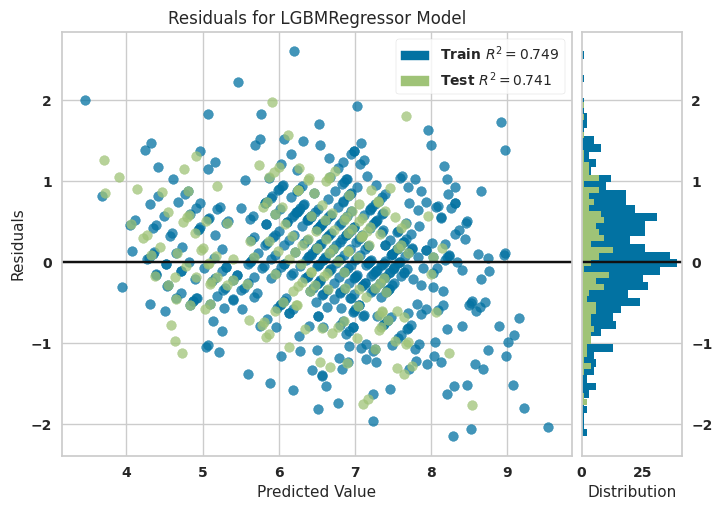

In [160]:
plot_model(final_best)

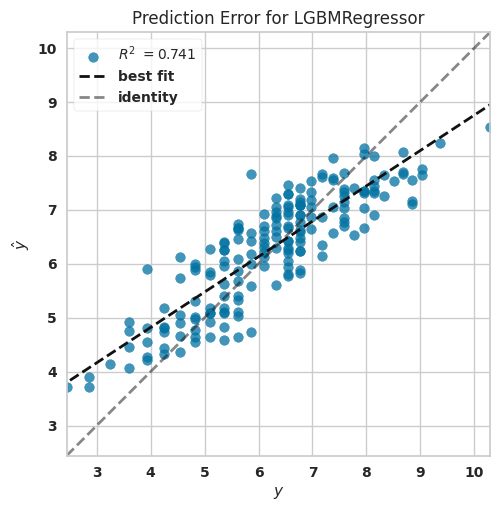

In [161]:
plot_model(final_best, plot = 'error')

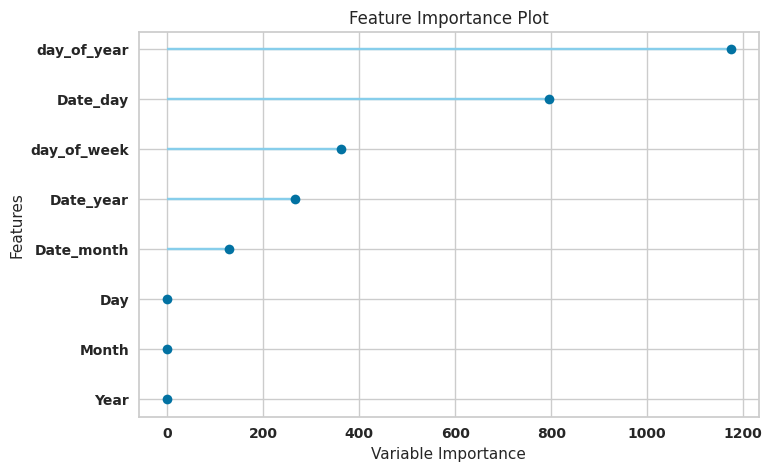

In [162]:
plot_model(final_best, plot='feature')

In [163]:
print(final_best)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('date_feature_extractor',
                 TransformerWrapper(include=['Date'],
                                    transformer=ExtractDateTimeFeatures())),
                ('numerical_imputer',
                 TransformerWrapper(include=['Year', 'Month', 'Day',
                                             'day_of_week', 'day_of_year'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator', LGBMRegressor(random_state=123))])


**Exploratory Data Analysis and Visualization of Total Delays by Date**

- Plot and observe any initial trends in total delays count data by date (first plot is **daily** frequency, so trends are difficult to observe at this granular data level)

- Convert date frequency to **weekly**, plot and observe any trends

- Convert date frequency to **monthly**, plot and observe any trends

- Analyze any potential cyclical trends in data further with Autocorrelation Plot (Lag)

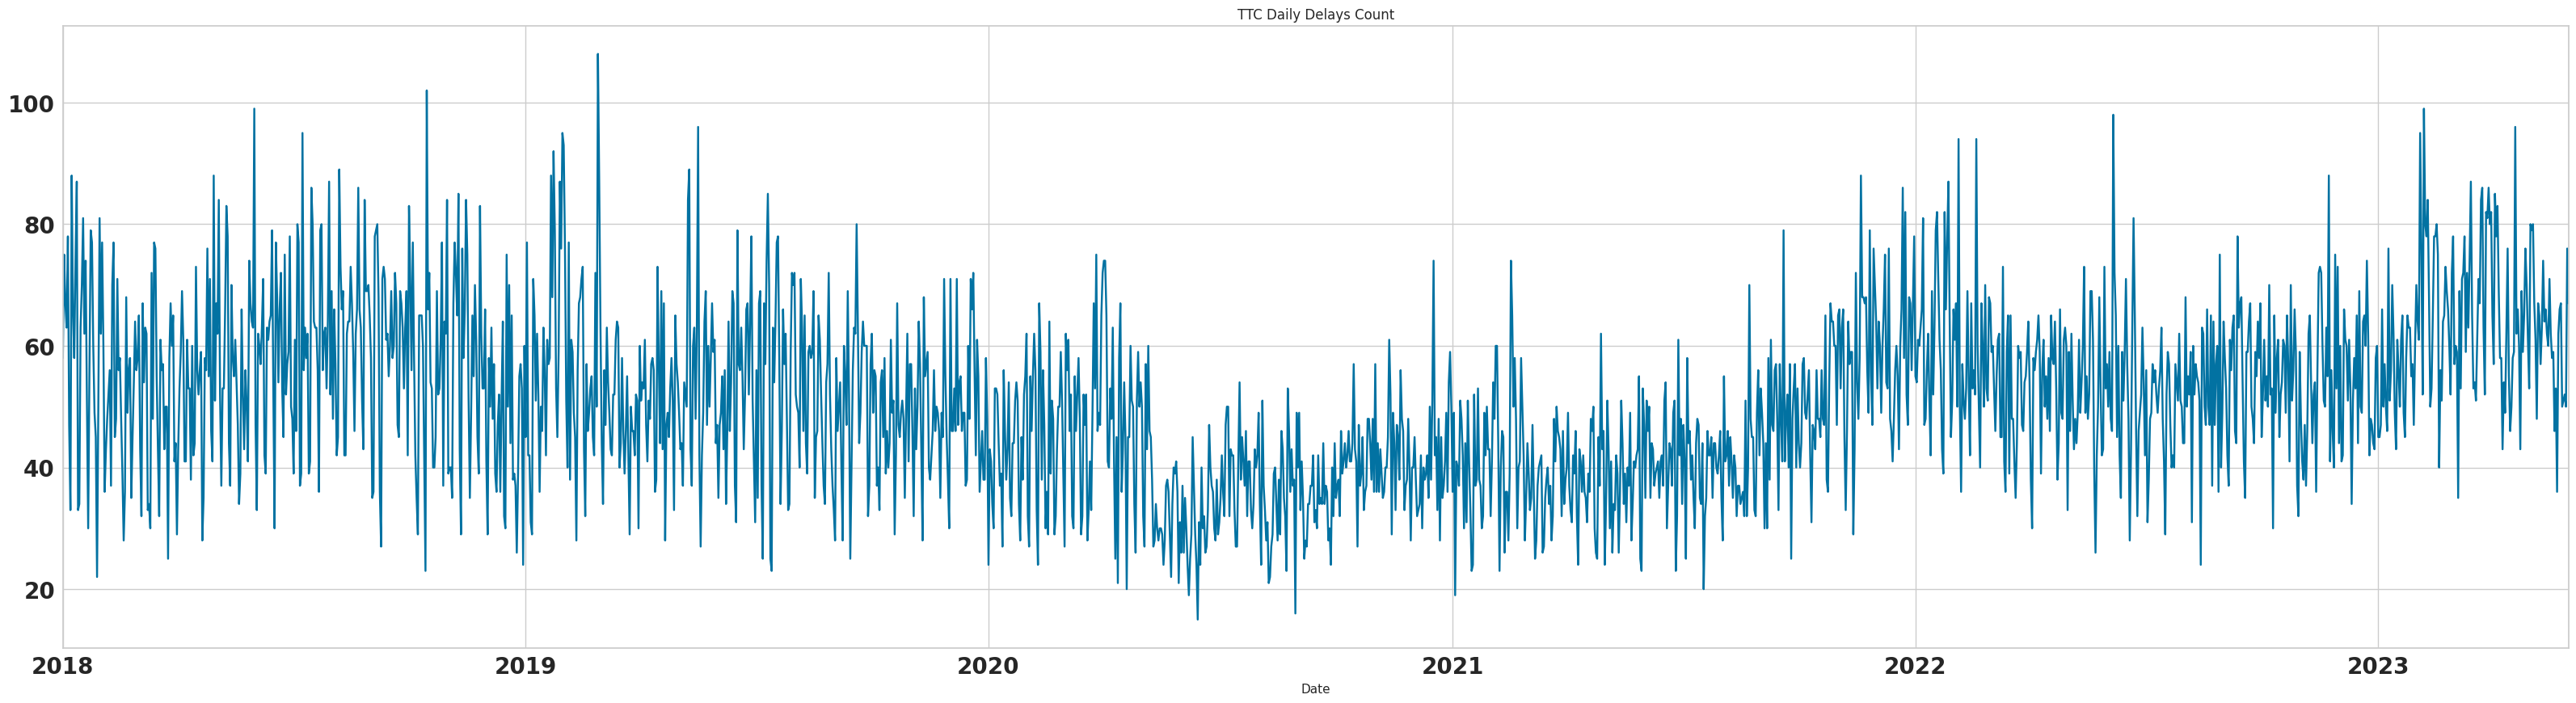

In [164]:
ttc_dailydelayscount = ttc.groupby('Date')['Time'].count()
ttc_dailydelayscount.plot(figsize=(40,10), title = 'TTC Daily Delays Count', fontsize=20)
plt.show();

In [165]:
ttc_dailydelayscount.shape

(1977,)

In [166]:
ttc_dailydelayscount.head()

Date
2018-01-01    58
2018-01-02    75
2018-01-03    67
2018-01-04    63
2018-01-05    78
Name: Time, dtype: int64

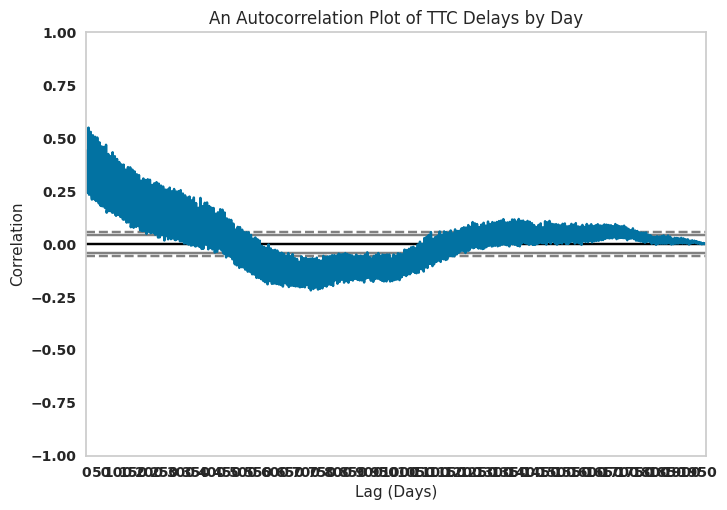

In [167]:
ttc_dailydelayscount_plot = pd.plotting.autocorrelation_plot(ttc_dailydelayscount)
ttc_dailydelayscount_plot.set_title("An Autocorrelation Plot of TTC Delays by Day")
ttc_dailydelayscount_plot.set_ylabel("Correlation")
ttc_dailydelayscount_plot.set_xlabel("Lag (Days)")
xticks_list = [*range(0, 1977, 50)]
ttc_dailydelayscount_plot.set_xticks(xticks_list)

plt.rc('figure', figsize=(60, 20));


Aggregate TTC Delays by Month (sum delays count by date)
- convert ttc_dailydelayscount to a dataframe
- aggregate by month by sum of daily delays by date
- test that the calculation of sum of delays by month is correct by adding up count of delays in January 2018 from the original df


In [168]:
ttc_dailydelayscountdf = pd.DataFrame(ttc_dailydelayscount)


In [169]:
ttc_dailydelayscountdf


Time
Date            
2018-01-01    58
2018-01-02    75
2018-01-03    67
2018-01-04    63
2018-01-05    78
...          ...
2023-05-27    51
2023-05-28    52
2023-05-29    50
2023-05-30    76
2023-05-31    67

[1977 rows x 1 columns]

In [170]:
ttc_dailydelayscountdf['Time']

Date
2018-01-01    58
2018-01-02    75
2018-01-03    67
2018-01-04    63
2018-01-05    78
              ..
2023-05-27    51
2023-05-28    52
2023-05-29    50
2023-05-30    76
2023-05-31    67
Name: Time, Length: 1977, dtype: int64

In [171]:
ttc_dailydelayscountdf.rename(columns={"Time" : "DelaysCount"}, inplace=True)

In [172]:
ttc_dailydelayscountdf.head(31)

DelaysCount
Date                   
2018-01-01           58
2018-01-02           75
2018-01-03           67
2018-01-04           63
2018-01-05           78
2018-01-06           47
2018-01-07           33
2018-01-08           88
2018-01-09           66
2018-01-10           58
2018-01-11           74
2018-01-12           87
2018-01-13           33
2018-01-14           34
2018-01-15           63
2018-01-16           70
2018-01-17           81
2018-01-18           62
2018-01-19           74
2018-01-20           51
2018-01-21           30
2018-01-22           56
2018-01-23           79
2018-01-24           77
2018-01-25           60
2018-01-26           49
2018-01-27           45
2018-01-28           22
2018-01-29           50
2018-01-30           81
2018-01-31           62

In [173]:
ttc_dailydelayscountdf.head(31).sum()

DelaysCount    1873
dtype: int64

In [174]:
ttc_dailydelayscountdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1977 entries, 2018-01-01 to 2023-05-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   DelaysCount  1977 non-null   int64
dtypes: int64(1)
memory usage: 30.9 KB


In [175]:
ttc_dailydelayscountdf.index=pd.to_datetime(ttc_dailydelayscountdf.index)

In [176]:
ttc_dailydelayscountdf.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29',
               '2023-05-30', '2023-05-31'],
              dtype='datetime64[ns]', name='Date', length=1977, freq=None)

CONVERT TO MONTHLY BY SUMMING COUNTS OF DELAYS




In [177]:
ttc_monthlydelayscountdf = ttc_dailydelayscountdf.resample('M').sum()


In [178]:
ttc_monthlydelayscountdf

DelaysCount
Date                   
2018-01-31         1873
2018-02-28         1470
2018-03-31         1621
2018-04-30         1597
2018-05-31         1761
...                 ...
2023-01-31         1738
2023-02-28         1904
2023-03-31         2105
2023-04-30         1885
2023-05-31         1919

[65 rows x 1 columns]

This is correct aggregation of delays count by month

Both sum/aggregation give 1873 delays in Jan.2018 in total

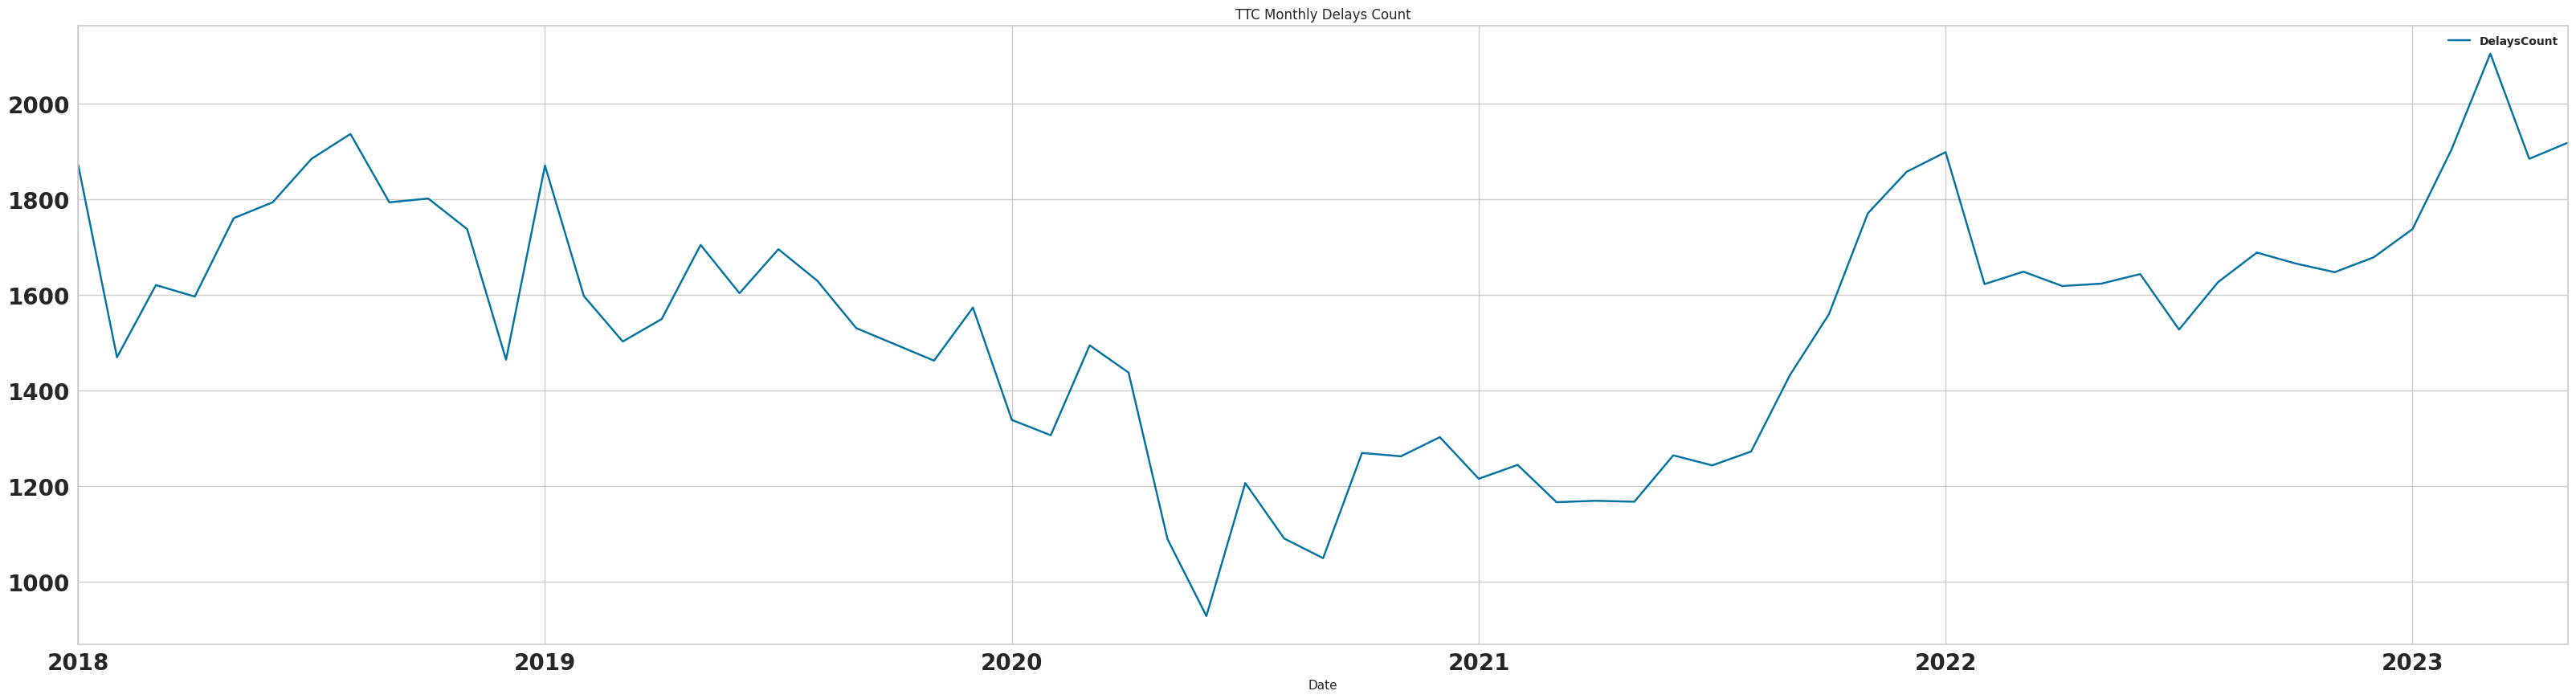

In [179]:
ttc_monthlydelayscountdf.plot(figsize=(40,10), title = 'TTC Monthly Delays Count', fontsize=20);

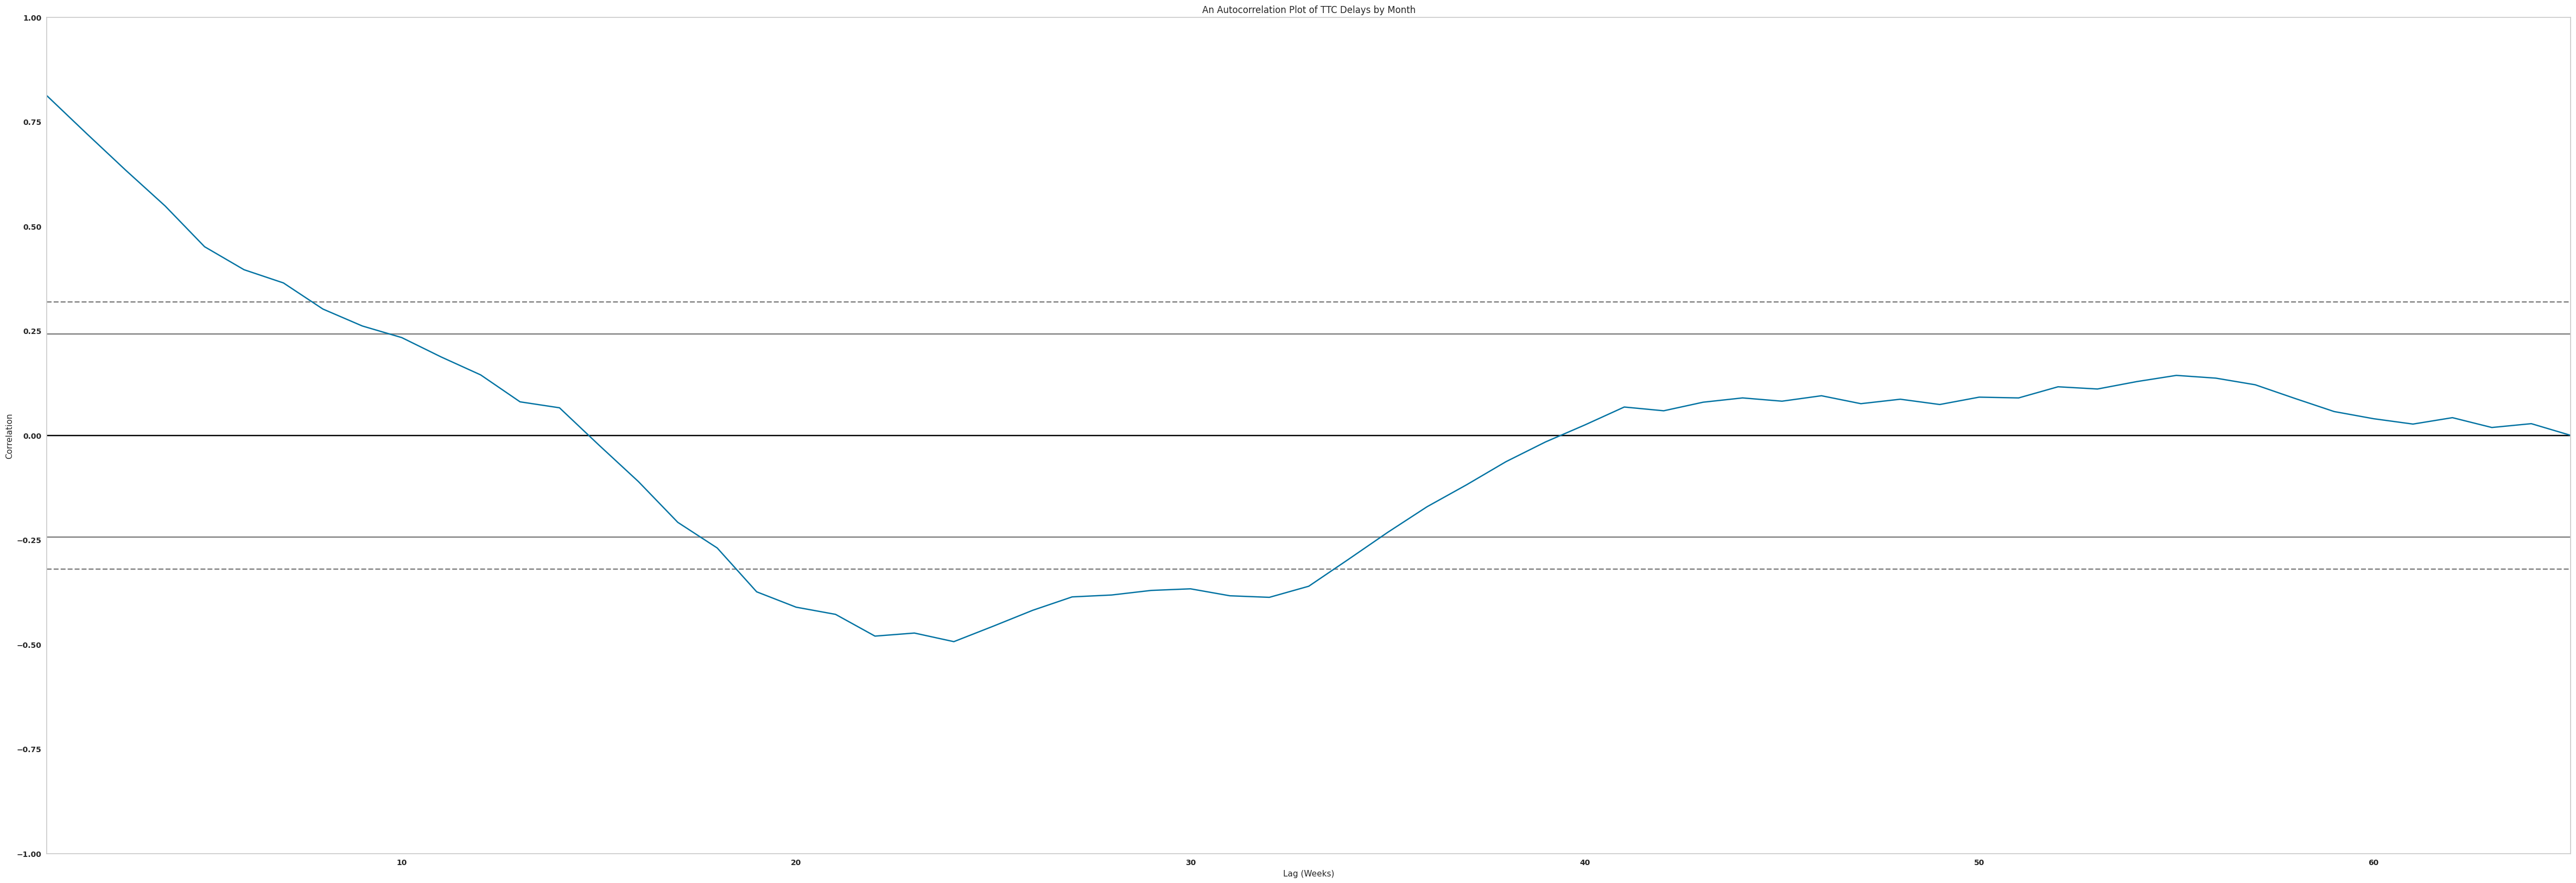

In [180]:
ttc_monthlydelayscountdf_plot = pd.plotting.autocorrelation_plot(ttc_monthlydelayscountdf)
ttc_monthlydelayscountdf_plot.set_title("An Autocorrelation Plot of TTC Delays by Month")
ttc_monthlydelayscountdf_plot.set_ylabel("Correlation")
ttc_monthlydelayscountdf_plot.set_xlabel("Lag (Weeks)")
#xticks_list = [*range(0, 282, 2)]
#ttc_monthlydelayscountdf_plot.set_xticks(xticks_list)

plt.rc('figure', figsize=(30, 20));

**Autocorrelation Plot (Lag) - Total Delays Count by Month**

TTC Delays by weekly frequency begin to show a potential trend of peaks and valleys (highs/lows) at certain interval.

We will analyze this potential cyclical trend in data further with Autocorrelation Plot (Lag) method

In [181]:
ttc_monthlydelayscountdf.shape

(65, 1)

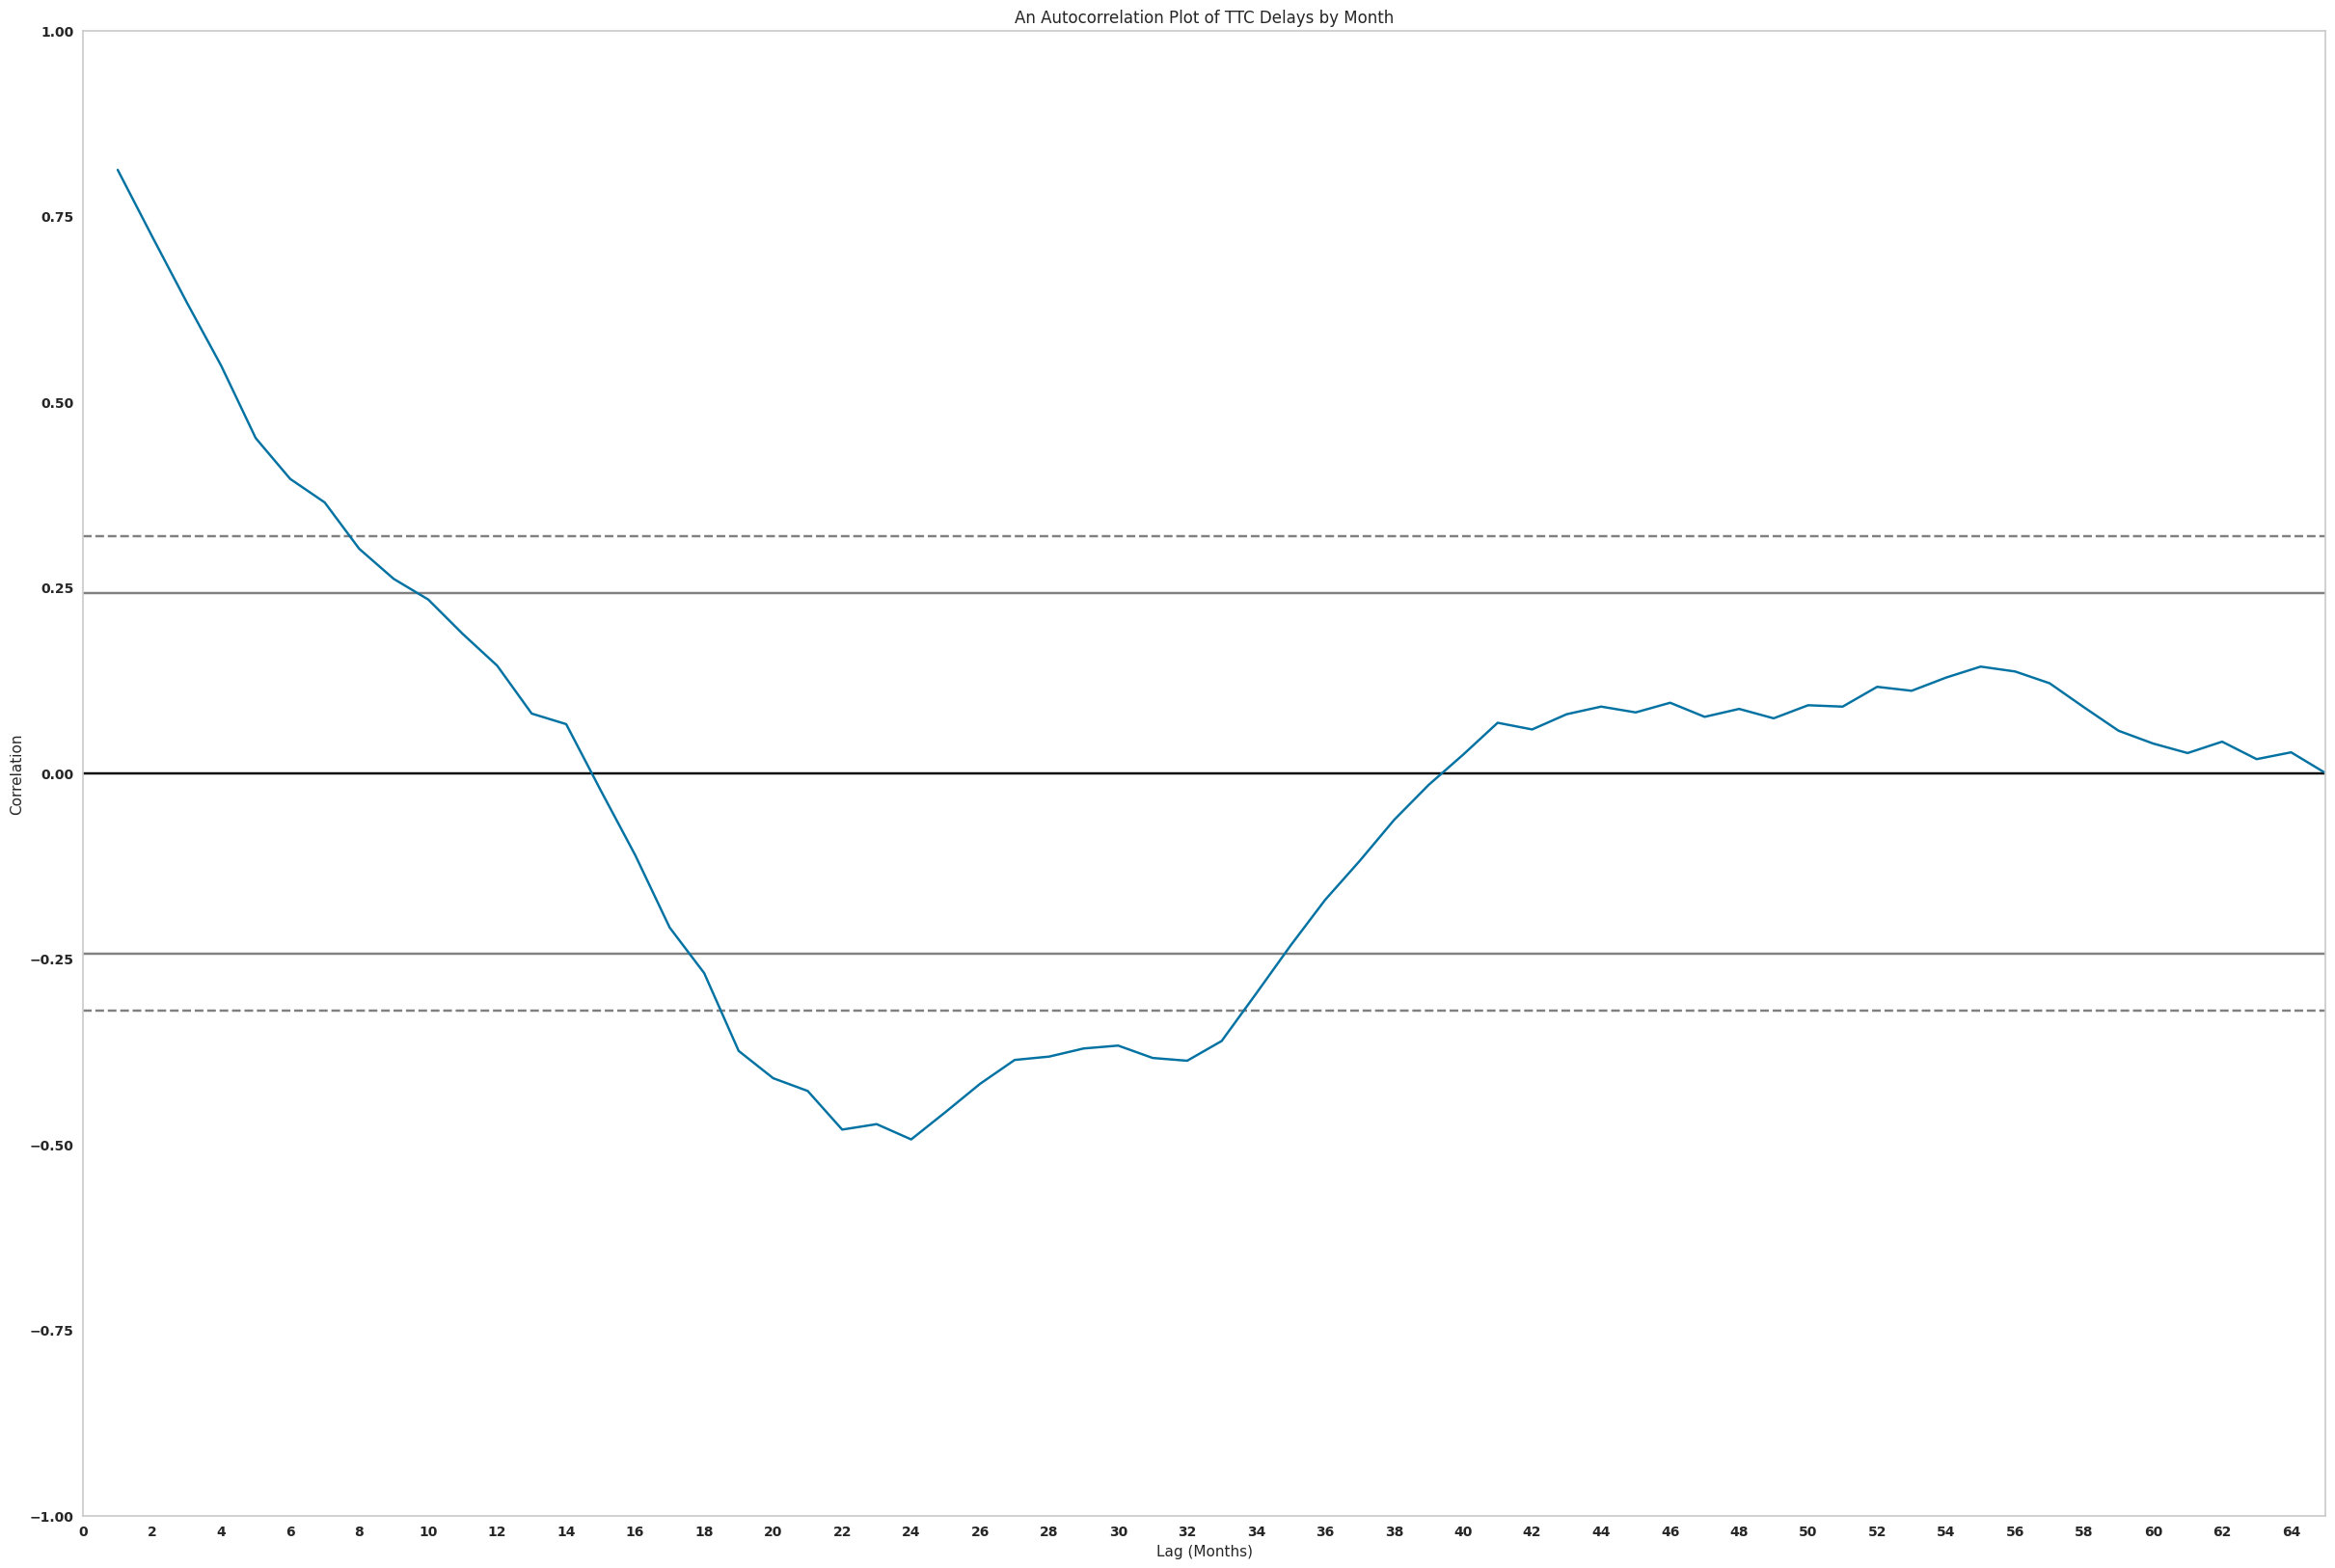

In [182]:
ttc_monthlydelayscountdf_plot = pd.plotting.autocorrelation_plot(ttc_monthlydelayscountdf)
ttc_monthlydelayscountdf_plot.set_title("An Autocorrelation Plot of TTC Delays by Month")
ttc_monthlydelayscountdf_plot.set_ylabel("Correlation")
ttc_monthlydelayscountdf_plot.set_xlabel("Lag (Months)")
xticks_list = [*range(0, 65, 2)]
ttc_monthlydelayscountdf_plot.set_xticks(xticks_list)

plt.rc('figure', figsize=(30, 6));

**Station Feature - Exploratory Analysis**

In [183]:
ttc_station_unique = ttc['Station'].unique()
ttc_station_unique

array(['SHEPPARD WEST STATION', 'DUNDAS STATION', 'MUSEUM STATION',
       'BAY LOWER', 'BLOOR DANFORTH SUBWAY', 'KIPLING STATION',
       'UNION STATION', 'COLLEGE STATION', 'WARDEN STATION',
       'WILSON YARD', 'DONLANDS STATION', 'KEELE STATION',
       'KENNEDY BD STATION', 'ISLINGTON STATION', 'KENNEDY SRT STATION',
       'VICTORIA PARK STATION', 'OLD MILL STATION', 'DAVISVILLE STATION',
       'EGLINTON WEST STATION', 'ROYAL YORK STATION', 'CHESTER STATION',
       'YONGE SHP STATION', 'COXWELL STATION', 'ST GEORGE BD STATION',
       'LANSDOWNE STATION', 'YONGE UNIVERSITY LINE', 'SHERBOURNE STATION',
       'EGLINTON STATION', 'PAPE STATION', 'BLOOR STATION',
       'ST PATRICK STATION', 'BROADVIEW STATION', 'VAUGHAN MC STATION',
       'CHRISTIE STATION', 'LAWRENCE EAST STATION',
       'PIONEER VILLAGE STATIO', 'MCCOWAN STATION', 'LAWRENCE STATION',
       'YONGE UNIVERSITY AND B', 'YORK MILLS STATION',
       'ST ANDREW STATION', 'HIGH PARK STATION', 'FINCH STATION',
     

In [184]:
print(len(ttc_station_unique))

830


*** There are 830 unique Station values due to data quality issues (duplicate/misspelled names of stations).

***Data Cleaning is needed (To be done below)

In [185]:
ttc_station = ttc['Station'].value_counts(normalize=True)

ttc_station

FINCH STATION             0.045695
KENNEDY BD STATION        0.038038
KIPLING STATION           0.034319
VAUGHAN MC STATION        0.033483
BLOOR STATION             0.028720
                            ...   
FINCH - NORTH YORK CEN    0.000010
YORK MILLS CENTRE         0.000010
BLOOR VIA DUCT            0.000010
YORK MILLS TO LAWRENCE    0.000010
WILSON YARD NORTH HOST    0.000010
Name: Station, Length: 830, dtype: float64

**Line Feature - Exploratory Analysis**

In [186]:
ttc_line_unique = ttc['Line'].unique()
ttc_line_unique

array(['YU', 'BD', 'SRT', 'SHP', 'YU/BD', nan, 'YU / BD', 'YU/ BD',
       'YU-BD', 'BLOOR DANFORTH LINES', '999', 'BD/YU', '16 MCCOWAN',
       'YUS', 'YONGE UNIVERSITY SERVI', '704 RAD BUS', 'B/D', 'BD LINE',
       'YU & BD', 'YU\\BD', '46 MARTIN GROVE', 'RT', 'BLOOR-DANFORTH',
       '134 PROGRESS', 'YU - BD', '985 SHEPPARD EAST EXPR', '22 COXWELL',
       '100 FLEMINGDON PARK', 'YU LINE', '29 DUFFERIN', '95 YORK MILLS',
       '35 JANE', 'BLOOR - DANFORTH', 'YU/BD LINE', 'YUS/BD',
       '40 JUNCTION-DUNDAS WES', '71 RUNNYMEDE', '102 MARKHAM ROAD',
       'YUS/DB', 'SHEP', 'YONGE/UNIVERSITY/BLOOR', '36 FINCH WEST',
       'YUS & BD', 'YU & BD LINES', '52', '41 KEELE', 'Y/BD',
       'YU/BD LINES', 'YUS AND BD', '69 WARDEN SOUTH', 'LINE 2 SHUTTLE',
       '57 MIDLAND', '96 WILSON', '506 CARLTON', 'BLOOR DANFORTH & YONGE',
       'BD LINE 2'], dtype=object)

In [187]:
print(len(ttc_line_unique))

56


In [188]:
ttc_line_group = ttc.groupby('Line')
ttc_line_df = pd.DataFrame(ttc_line_group.mean())
ttc_line_df.head()

Min Delay  Min Gap  Vehicle
Line                                            
100 FLEMINGDON PARK        0.0      0.0   8783.0
102 MARKHAM ROAD           0.0      0.0   9238.0
134 PROGRESS               0.0      0.0   9089.0
16 MCCOWAN                 0.0      0.0   7766.0
22 COXWELL                 0.0      0.0   3103.0

**Min Delay Mean by Line**

The highest mean Min Delay was on SRT, followed by BD LINE2, YU, BD, SHP.

In [189]:
ttc_line_df.sort_values(by='Min Delay', ascending=False)

Min Delay   Min Gap      Vehicle
Line                                                    
SRT                      5.912023  8.415294  1827.671329
BD LINE 2                4.000000  8.000000  2540.000000
YU                       3.004556  4.464199  3989.230676
BD                       2.768978  4.093152  3557.697318
SHP                      2.767317  4.451513  4738.107153
YU/BD                    0.002674  0.005348     5.870588
100 FLEMINGDON PARK      0.000000  0.000000  8783.000000
YU & BD LINES            0.000000  0.000000     0.000000
RT                       0.000000  0.000000    56.000000
SHEP                     0.000000  0.000000     0.000000
Y/BD                     0.000000  0.000000     0.000000
YONGE UNIVERSITY SERVI   0.000000  0.000000     0.000000
YONGE/UNIVERSITY/BLOOR   0.000000  0.000000     0.000000
YU & BD                  0.000000  0.000000     0.000000
YU - BD                  0.000000  0.000000     0.000000
BLOOR-DANFORTH           0.000000  0.000000     0.000000
YU / BD                  0.000000  0.000000     0.000000
YU LINE                  0.000000  0.000000     0.000000
YU-BD                    0.000000  0.000000     0.000000
YU/ BD                   0.000000  0.000000     0.000000
YU/BD LINE               0.000000  0.000000     0.000000
YU/BD LINES              0.000000  0.000000     0.000000
YUS                      0.000000  0.000000     0.000000
YUS & BD                 0.000000  0.000000     0.000000
YUS AND BD               0.000000  0.000000     0.000000
YUS/BD                   0.000000  0.000000     0.000000
YUS/DB                   0.000000  0.000000     0.000000
LINE 2 SHUTTLE           0.000000  0.000000     0.000000
BLOOR DANFORTH & YONGE   0.000000  0.000000     0.000000
BLOOR DANFORTH LINES     0.000000  0.000000     0.000000
102 MARKHAM ROAD         0.000000  0.000000  9238.000000
134 PROGRESS             0.000000  0.000000  9089.000000
16 MCCOWAN               0.000000  0.000000  7766.000000
22 COXWELL               0.000000  0.000000  3103.000000
29 DUFFERIN              0.000000  0.000000  9051.000000
35 JANE                  0.000000  0.000000  2192.000000
36 FINCH WEST            0.000000  0.000000  3640.000000
40 JUNCTION-DUNDAS WES   0.000000  0.000000     0.000000
41 KEELE                 0.000000  0.000000  1422.000000
46 MARTIN GROVE          0.000000  0.000000  3124.000000
506 CARLTON              0.000000  0.000000  8871.000000
52                       0.000000  0.000000  3369.000000
57 MIDLAND               0.000000  0.000000  3200.000000
69 WARDEN SOUTH          0.000000  0.000000  8422.000000
704 RAD BUS              0.000000  0.000000  3330.000000
71 RUNNYMEDE             0.000000  0.000000     0.000000
95 YORK MILLS            0.000000  0.000000  3441.000000
96 WILSON                0.000000  0.000000     0.000000
985 SHEPPARD EAST EXPR   0.000000  0.000000  9089.000000
999                      0.000000  0.000000     0.000000
B/D                      0.000000  0.000000     0.000000
BD LINE                  0.000000  0.000000     0.000000
BD/YU                    0.000000  0.000000     0.000000
BLOOR - DANFORTH         0.000000  0.000000     0.000000
YU\BD                    0.000000  0.000000     0.000000

In [190]:
ttc.groupby('Line')['Vehicle'].count().sort_values(ascending=False).head(10)

Line
YU         50920
BD         39269
SRT         4433
SHP         3537
YU/BD       1870
YU / BD       75
YUS           31
YU/ BD        15
BD/YU         13
YU & BD       11
Name: Vehicle, dtype: int64

Highest number of total delays by line was on YU, BD, SRT, SHP, YU/BD.

In [191]:
ttc_toplines= ttc[ttc['Line'].isin(['YU', 'BD', 'SRT', 'SHP', 'YU/BD'])]
ttc_toplines['Line'].value_counts()

YU       50920
BD       39269
SRT       4433
SHP       3537
YU/BD     1870
Name: Line, dtype: int64

Confirm that the right Lines were selected and have the expected number of values, same as above where we identified which lines have the maximum number of delays

In [192]:
ttc_toplines.head()

Date                Time     Day                Station   Code  \
0 2018-01-01 2023-07-18 00:29:00  Monday  SHEPPARD WEST STATION  MUATC   
1 2018-01-01 2023-07-18 01:07:00  Monday         DUNDAS STATION  MUNCA   
2 2018-01-01 2023-07-18 01:22:00  Monday         MUSEUM STATION   MUSC   
3 2018-01-01 2023-07-18 01:28:00  Monday              BAY LOWER   EUOE   
4 2018-01-01 2023-07-18 01:39:00  Monday         MUSEUM STATION    MUO   

   Min Delay  Min Gap Bound Line  Vehicle             Delay Description  
0         10       15     N   YU     5986                   ATC Project  
1          0        0   NaN   YU        0                           NaN  
2          0        0     N   YU     5751   Miscellaneous Speed Control  
3          0        0   NaN   BD     5222  Rail Cars & Shops Opr. Error  
4          6       11     S   YU     5781           Miscellaneous Other

In [193]:
#ttc_toplines = ttc.groupby('Line')['Vehicle'].count()
#ttc_toplines.dtype

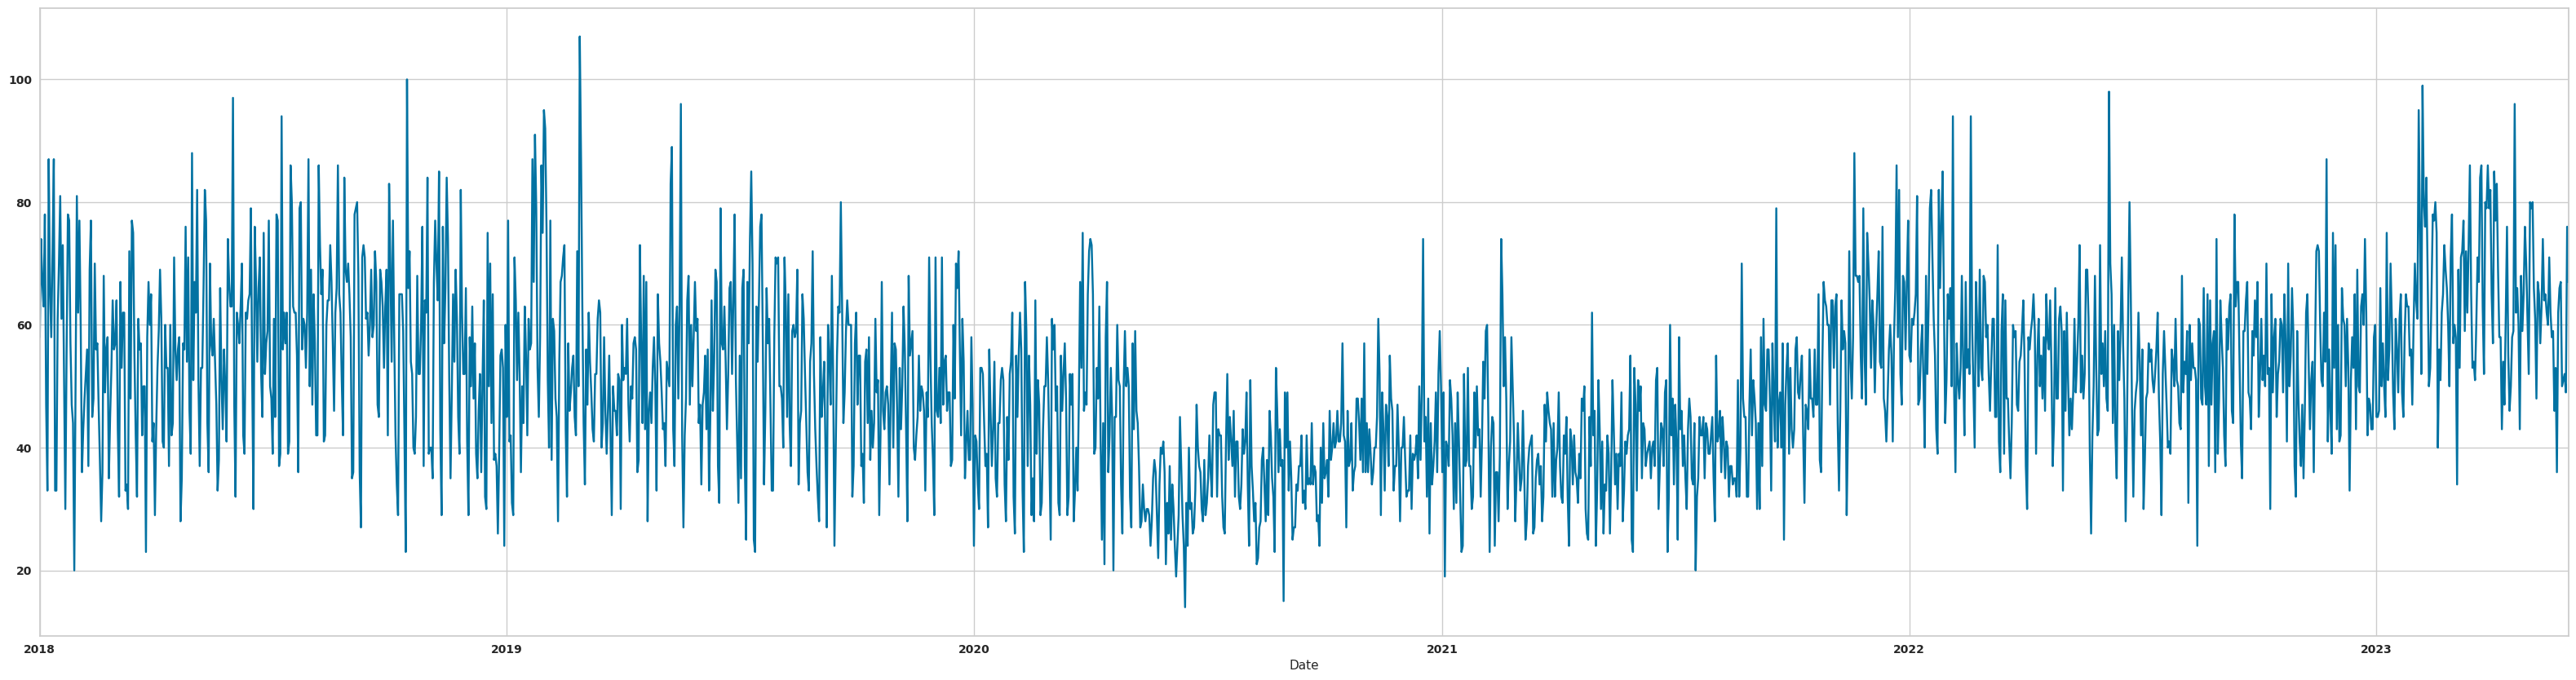

In [194]:
ttc_dailydelayscounttoplines = ttc_toplines.groupby('Date')['Time'].count()
ttc_dailydelayscounttoplines.plot(figsize=(40,10));

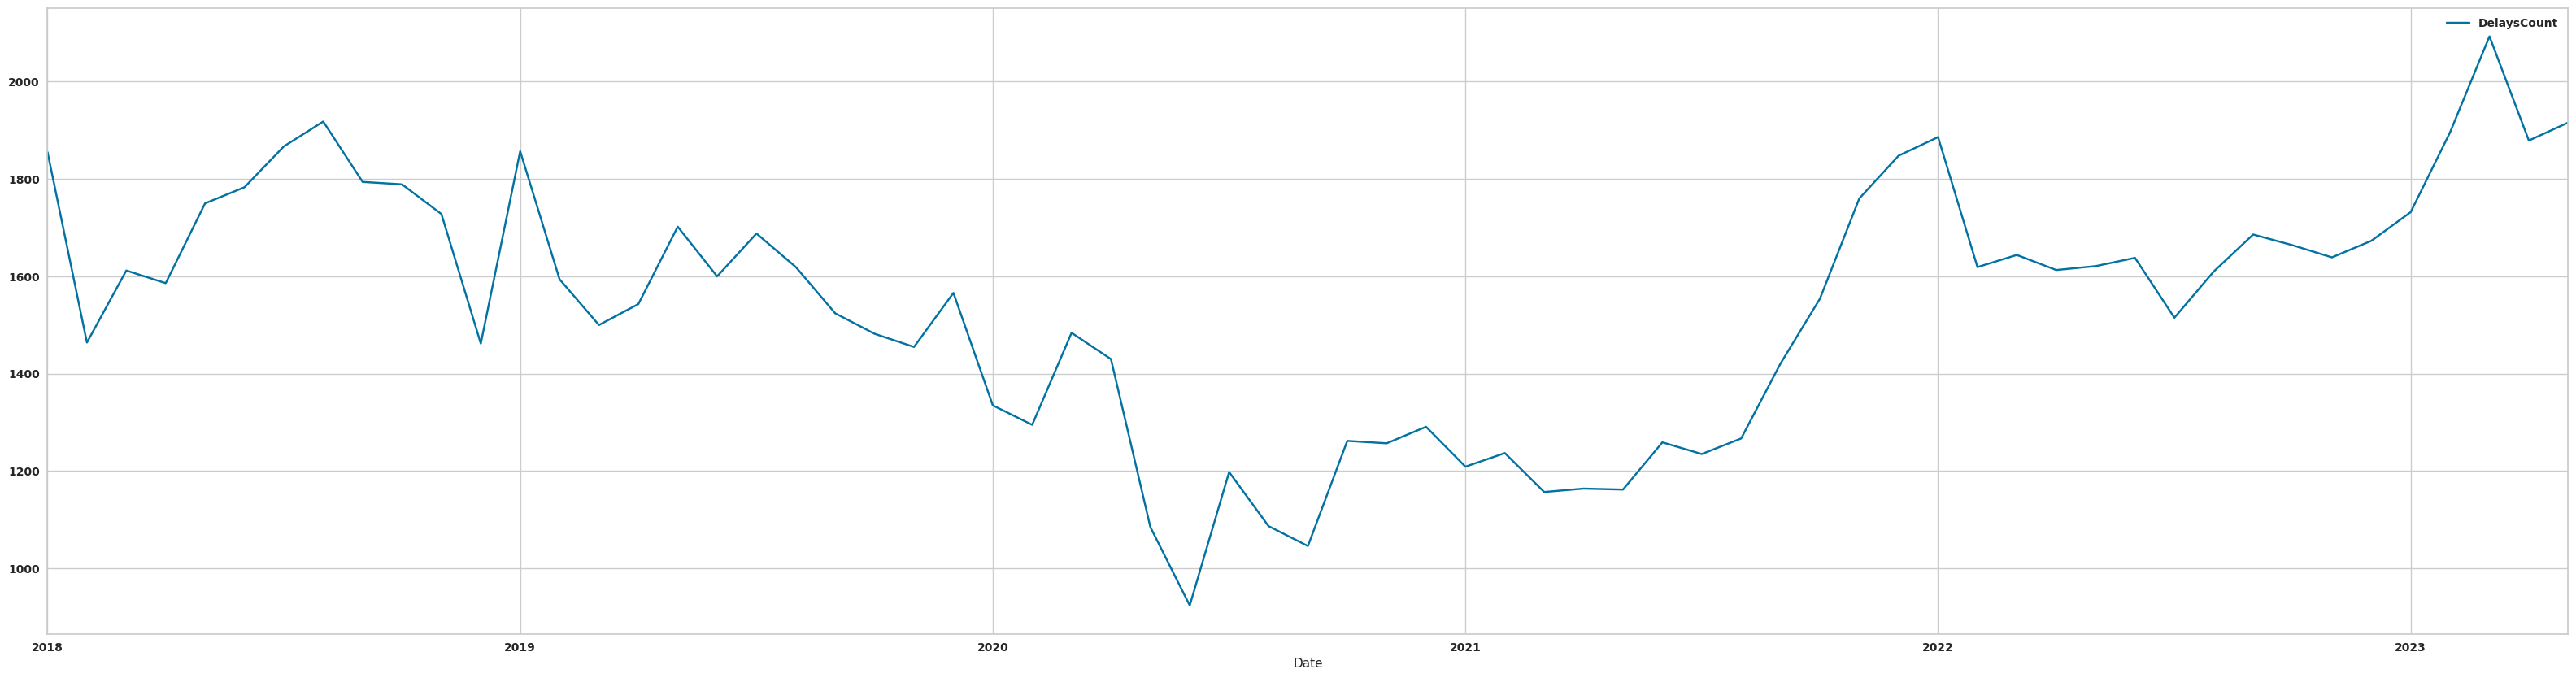

In [195]:

ttc_dailydelayscounttoplines_monthly = pd.DataFrame(ttc_dailydelayscounttoplines)
ttc_dailydelayscounttoplines_monthly.rename(columns={"Time" : "DelaysCount"}, inplace=True)
ttc_dailydelayscounttoplines_monthly.index=pd.to_datetime(ttc_dailydelayscounttoplines_monthly.index)
ttc_dailydelayscounttoplines_monthly = ttc_dailydelayscounttoplines_monthly.resample('M').sum()
ttc_dailydelayscounttoplines_monthly.plot(figsize=(40,10));


Define Function to Aggregate Monthly by Sum of Daily Delay Counts

In [196]:
def aggregate_monthly(df):

  df_monthly = pd.DataFrame(df)
  df_monthly.rename(columns={"Time" : "DelaysCount"}, inplace=True)
  df_monthly.index=pd.to_datetime(df_monthly.index)
  df_monthly = df_monthly.resample('M').sum()
  return df_monthly

In [197]:
ttc_toplinesYU= ttc[ttc['Line'].isin(['YU'])]
ttc_dailydelayscountYU = ttc_toplinesYU.groupby('Date')['Time'].count()

In [198]:
ttc_toplinesYU_monthly = aggregate_monthly(ttc_dailydelayscountYU)

In [199]:
ttc_toplinesYU_monthly

DelaysCount
Date                   
2018-01-31          856
2018-02-28          686
2018-03-31          768
2018-04-30          748
2018-05-31          825
...                 ...
2023-01-31          830
2023-02-28          976
2023-03-31         1043
2023-04-30          904
2023-05-31          849

[65 rows x 1 columns]

Apply Aggregate Monthly Function to individual TTC Lines and Plot

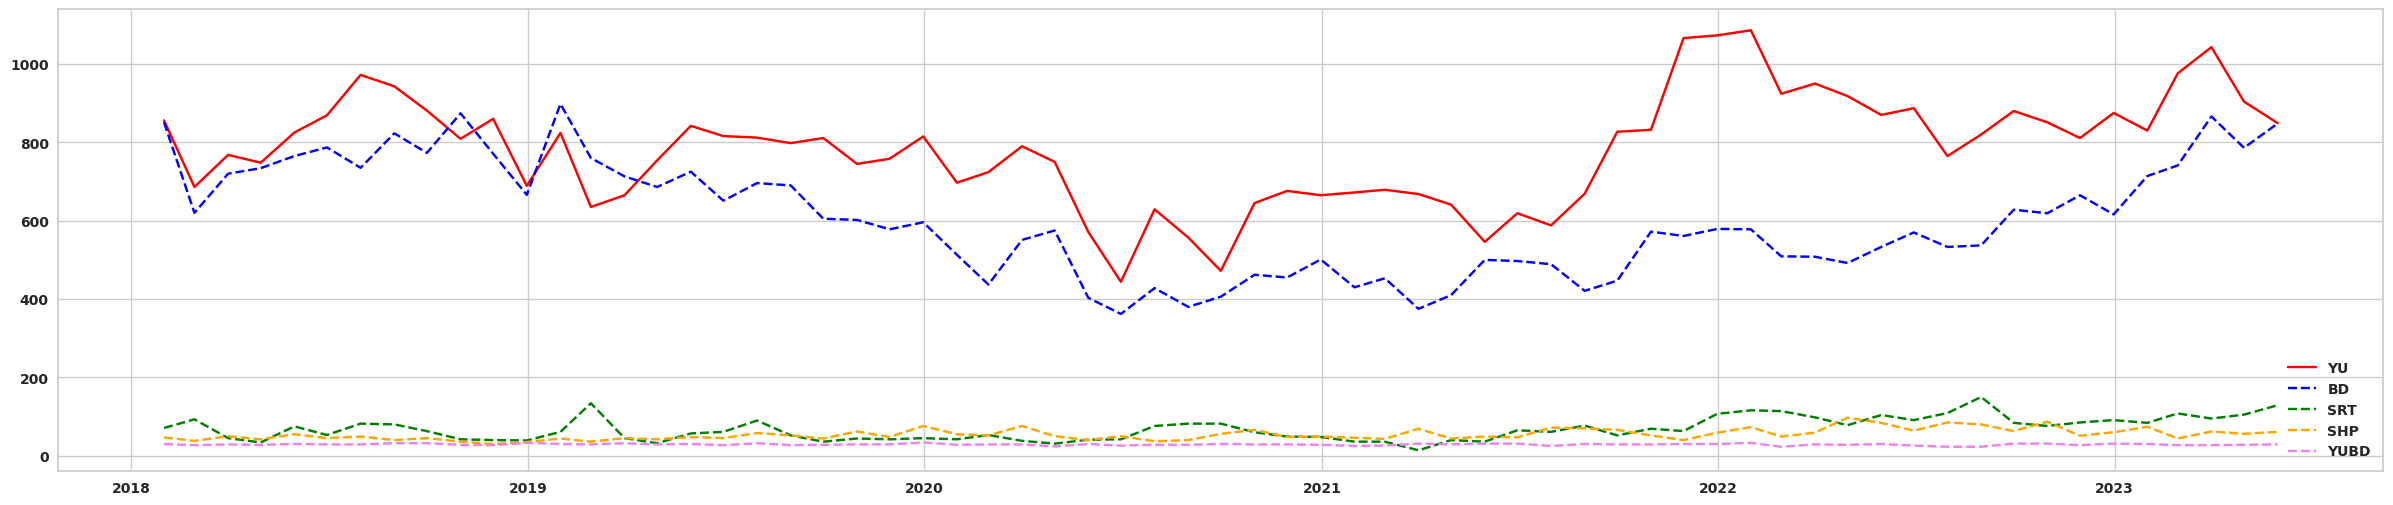

<Figure size 4000x1000 with 0 Axes>

In [200]:
# Plot individual Line plots on the same graph to see any differences between the individual Lines over time
# We see that each line has individual trend of delays and YU and BD lines have the most delays, the other 3 lines have much lower delays overall. This makes sense since YU and BD are the main subway lines that carry most of the passengers.
ttc_toplinesYU= ttc[ttc['Line'].isin(['YU'])]
ttc_dailydelayscountYU = ttc_toplinesYU.groupby('Date')['Time'].count()
ttc_toplinesYU_monthly = aggregate_monthly(ttc_dailydelayscountYU)

ttc_toplinesBD= ttc[ttc['Line'].isin(['BD'])]
ttc_dailydelayscountBD = ttc_toplinesBD.groupby('Date')['Time'].count()
ttc_toplinesBD_monthly = aggregate_monthly(ttc_dailydelayscountBD)

ttc_toplinesSRT= ttc[ttc['Line'].isin(['SRT'])]
ttc_dailydelayscountSRT = ttc_toplinesSRT.groupby('Date')['Time'].count()
ttc_toplinesSRT_monthly = aggregate_monthly(ttc_dailydelayscountSRT)

ttc_toplinesSHP= ttc[ttc['Line'].isin(['SHP'])]
ttc_dailydelayscountSHP = ttc_toplinesSHP.groupby('Date')['Time'].count()
ttc_toplinesSHP_monthly = aggregate_monthly(ttc_dailydelayscountSHP)

ttc_toplinesYUBD= ttc[ttc['Line'].isin(['YU/BD'])]
ttc_dailydelayscountYUBD = ttc_toplinesYUBD.groupby('Date')['Time'].count()
ttc_toplinesYUBD_monthly = aggregate_monthly(ttc_dailydelayscountYUBD)

plt.plot(ttc_toplinesYU_monthly, color='red')
plt.plot(ttc_toplinesBD_monthly, color = 'blue', linestyle='dashed')
plt.plot(ttc_toplinesSRT_monthly, color = 'green', linestyle='dashed')
plt.plot(ttc_toplinesSHP_monthly, color = 'orange', linestyle='dashed')
plt.plot(ttc_toplinesYUBD_monthly, color = 'violet', linestyle='dashed')



plt.legend(["YU", "BD", "SRT", "SHP", "YUBD"], loc ="lower right")
plt.figure(figsize=(40,10))

plt.show()

YU Line overall has a higher number of delays compared to BD Line. Other lines have significantly fewer delays overall.
According to TTC Statistics, both YU and BD Lines have similar passenger volumes per Year

**Busiest Stations (Estimated passenger trips to and from trains daily) 2019**


https://www.ttc.ca/en/transparency-and-accountability/Operating-Statistics/Operating-Statistics---2019

Bloor (Yonge-University) … 204,600
Yonge (Bloor-Danforth) … 183,500
Union … 143,600
St George (Yonge-University) … 130,900
St George (Bloor-Danforth) … 128,300
Finch … 94,400
Kennedy (Bloor-Danforth) … 80,100
Sheppard-Yonge (Yonge-University) … 79,700
Dundas … 73,100
Eglinton … 70,900

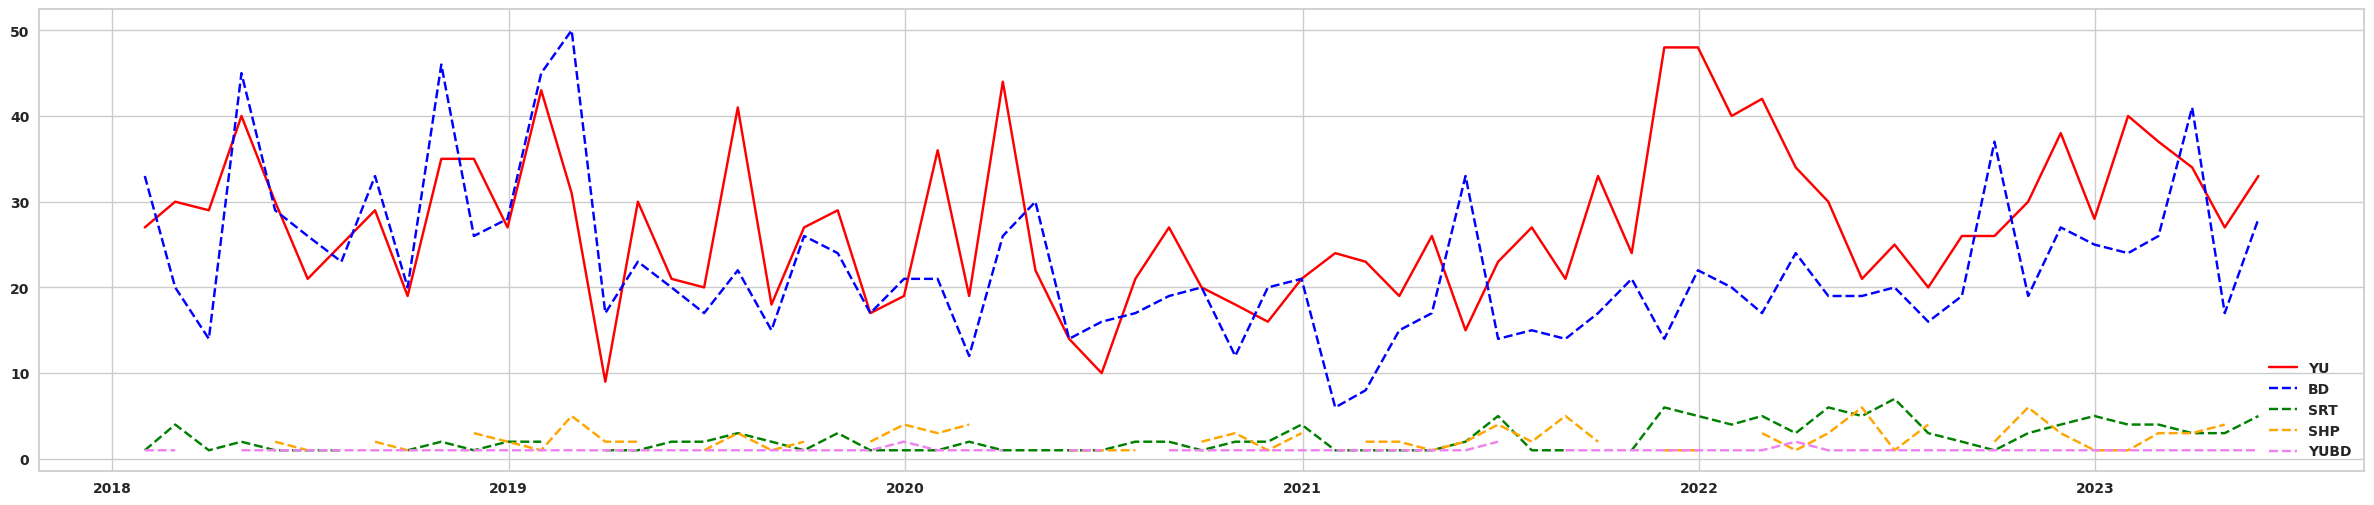

<Figure size 4000x1000 with 0 Axes>

In [201]:
# Plot individual Line plots on the same graph to see any differences between the individual Lines over time
# We see that each line has individual trend of delays and YU and BD lines have the most delays, the other 3 lines have much lower delays overall. This makes sense since YU and BD are the main subway lines that carry most of the passengers.
ttc_toplinesYU= ttc[ttc['Line'].isin(['YU'])]
ttc_dailydelayscountYU = ttc_toplinesYU.groupby('Date')['Time'].count()

ttc_toplinesBD= ttc[ttc['Line'].isin(['BD'])]
ttc_dailydelayscountBD = ttc_toplinesBD.groupby('Date')['Time'].count()

ttc_toplinesSRT= ttc[ttc['Line'].isin(['SRT'])]
ttc_dailydelayscountSRT = ttc_toplinesSRT.groupby('Date')['Time'].count()

ttc_toplinesSHP= ttc[ttc['Line'].isin(['SHP'])]
ttc_dailydelayscountSHP = ttc_toplinesSHP.groupby('Date')['Time'].count()

ttc_toplinesYUBD= ttc[ttc['Line'].isin(['YU/BD'])]
ttc_dailydelayscountYUBD = ttc_toplinesYUBD.groupby('Date')['Time'].count()

plt.plot(ttc_dailydelayscountYU.asfreq(freq='M'), color='red')
plt.plot(ttc_dailydelayscountBD.asfreq(freq='M'), color = 'blue', linestyle='dashed')
plt.plot(ttc_dailydelayscountSRT.asfreq(freq='M'), color = 'green', linestyle='dashed')
plt.plot(ttc_dailydelayscountSHP.asfreq(freq='M'), color = 'orange', linestyle='dashed')
plt.plot(ttc_dailydelayscountYUBD.asfreq(freq='M'), color = 'violet', linestyle='dashed')



plt.legend(["YU", "BD", "SRT", "SHP", "YUBD"], loc ="lower right")
plt.figure(figsize=(40,10))

plt.show()

In [202]:
ttc_dailydelayscountYU

Date
2018-01-01    23
2018-01-02    38
2018-01-03    26
2018-01-04    34
2018-01-05    34
              ..
2023-05-27    20
2023-05-28    26
2023-05-29    17
2023-05-30    37
2023-05-31    33
Name: Time, Length: 1977, dtype: int64

Plot Scatter plot of Monthly Delays for YU and BD Lines

to see if there is any correlation between TTC Lines

(i.e. similar pattern in delays for both TTC Lines)

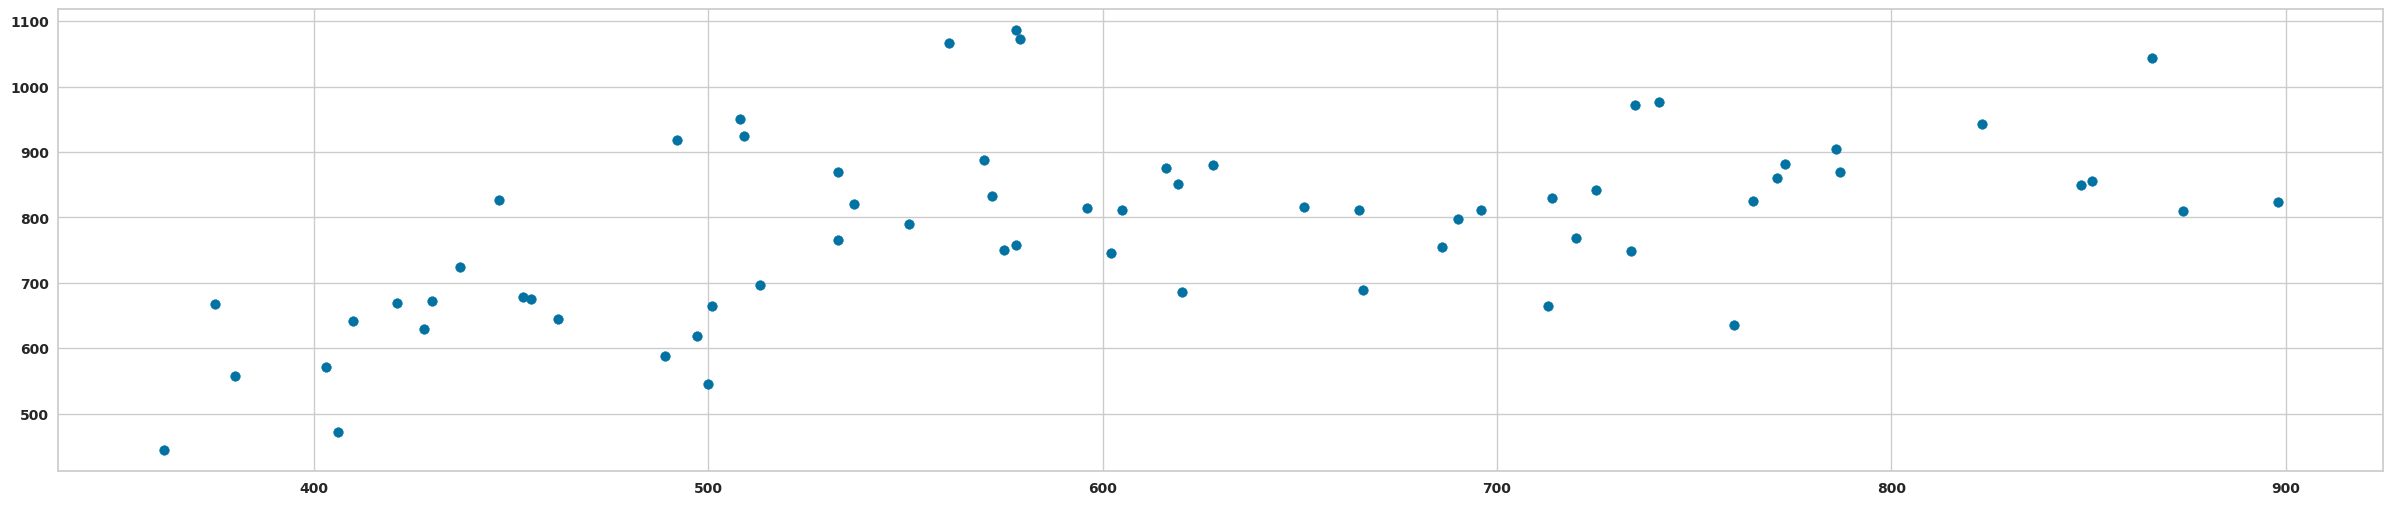

<Figure size 1000x1000 with 0 Axes>

In [203]:
plt.scatter(ttc_toplinesBD_monthly, ttc_toplinesYU_monthly)
plt.figure(figsize=(10,10))
plt.show()

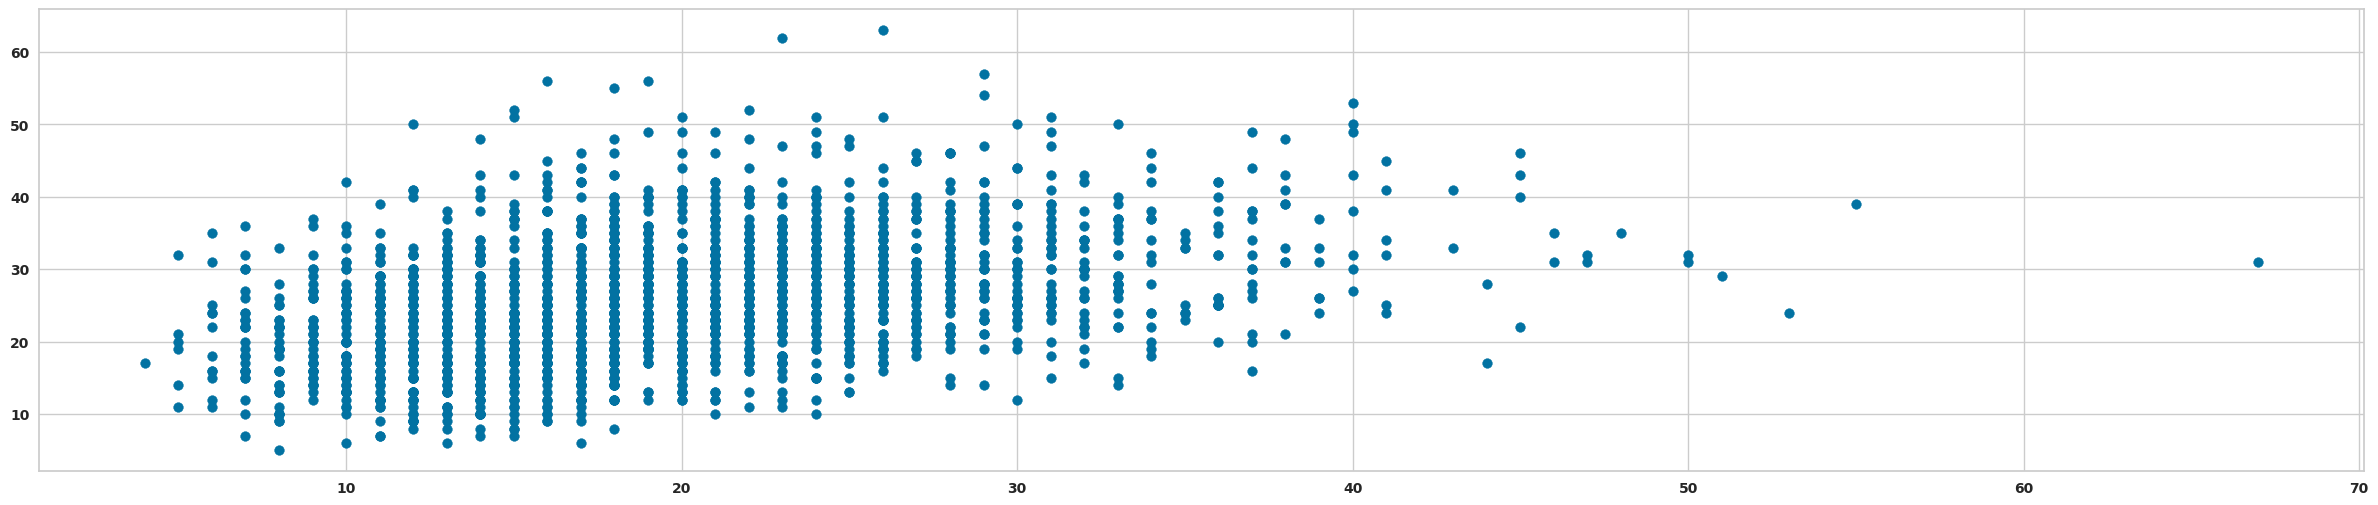

<Figure size 1000x1000 with 0 Axes>

In [204]:
plt.scatter(ttc_dailydelayscountBD, ttc_dailydelayscountYU)

plt.figure(figsize=(10,10))

plt.show()

In [205]:
import seaborn as sns

In [206]:
df1=pd.DataFrame(ttc.groupby(['Delay Description','Code', 'Line'])['Code'].count())
df1=df1.rename(columns={'Code': 'num'})
df1=df1.reset_index()


In [207]:
df1=df1.sort_values('num',ascending=False).head(50)

In [208]:
df1.shape

(50, 4)

In [209]:
df1

Delay Description   Code   Line   num
60                                   Disorderly Patron   SUDP     YU  4946
160  Injured or ill Customer (In Station) - Transpo...   MUIS     YU  4858
268  Passenger Assistance Alarm Activated - No Trou...  MUPAA     YU  4535
155  Injured or ill Customer (In Station) - Transpo...   MUIS     BD  4215
58                                   Disorderly Patron   SUDP     BD  3963
224                        Miscellaneous Speed Control   MUSC     BD  3530
2                                          ATC Project  MUATC     YU  2756
226                        Miscellaneous Speed Control   MUSC     YU  2410
256                              Operator Overspeeding   TUSC     BD  2146
266  Passenger Assistance Alarm Activated - No Trou...  MUPAA     BD  2054
215                                Miscellaneous Other    MUO  YU/BD  1846
143  Injured or ill Customer (In Station) - Medical...  MUIRS     YU  1835
244                 OPTO (COMMS) Train Door Monitoring  PUOPO     YU  1820
273                                    Passenger Other    SUO     YU  1795
271                                    Passenger Other    SUO     BD  1664
258                              Operator Overspeeding   TUSC     YU  1638
207                                Miscellaneous Other    MUO     YU  1536
165  Injured or ill Customer (On Train) - Medical A...   MUIR     YU  1522
141  Injured or ill Customer (In Station) - Medical...  MUIRS     BD  1391
100                        Escalator/Elevator Incident  PUMEL     YU  1364
242  No Operator Immediately Available - Not E.S.A....  MUNOA     YU  1181
96                         Escalator/Elevator Incident  PUMEL     BD  1180
259                           Operator Violated Signal  TUMVS     BD  1163
238                 No Operator Immediately Available   TUNOA     YU  1065
430                        Unauthorized at Track Level   SUUT     YU  1049
163  Injured or ill Customer (On Train) - Medical A...   MUIR     BD  1046
188  Misc. Transportation Other - Employee Non-Char...   MUTO     YU  1042
169   Injured or ill Customer (On Train) - Transported    MUI     YU  1024
19                           Assault / Patron Involved   SUAP     YU   989
341                          Speed Control Equipment     EUSC     YU   924
195                                Miscellaneous Other    MRO    SRT   917
197                                Miscellaneous Other    MUO     BD   902
17                           Assault / Patron Involved   SUAP     BD   887
339                          Speed Control Equipment     EUSC     BD   876
428                        Unauthorized at Track Level   SUUT     BD   816
167   Injured or ill Customer (On Train) - Transported    MUI     BD   763
419                  Transportation Department - Other    TUO     YU   758
261                           Operator Violated Signal  TUMVS     YU   735
66                      Door Problems - Debris Related   MUDD     BD   668
252                           Operator Not In Position  TUNIP     YU   631
240  No Operator Immediately Available - Not E.S.A....  MUNOA     BD   589
186  Misc. Transportation Other - Employee Non-Char...   MUTO     BD   585
434                                 Unsanitary Vehicle  MUSAN     YU   559
72                    Door Problems - Faulty Equipment   EUDO     YU   554
70                    Door Problems - Faulty Equipment   EUDO     BD   522
257                              Operator Overspeeding   TUSC    SHP   504
190                       Miscellaneous General Delays   MUGD     BD   488
417                  Transportation Department - Other    TUO     BD   479
13                         Assault / Employee Involved   SUAE     YU   450
349                         Station Stairway Incident   PUMST     BD   436

In [210]:
df2=df1[df1['Line'].isin(['YU', 'BD', 'SRT', 'SHP', 'YU/BD'])]
df2.rename(columns={"Delay Description" : "DelayDescription"}, inplace=True)

In [211]:
df2

DelayDescription   Code   Line   num
60                                   Disorderly Patron   SUDP     YU  4946
160  Injured or ill Customer (In Station) - Transpo...   MUIS     YU  4858
268  Passenger Assistance Alarm Activated - No Trou...  MUPAA     YU  4535
155  Injured or ill Customer (In Station) - Transpo...   MUIS     BD  4215
58                                   Disorderly Patron   SUDP     BD  3963
224                        Miscellaneous Speed Control   MUSC     BD  3530
2                                          ATC Project  MUATC     YU  2756
226                        Miscellaneous Speed Control   MUSC     YU  2410
256                              Operator Overspeeding   TUSC     BD  2146
266  Passenger Assistance Alarm Activated - No Trou...  MUPAA     BD  2054
215                                Miscellaneous Other    MUO  YU/BD  1846
143  Injured or ill Customer (In Station) - Medical...  MUIRS     YU  1835
244                 OPTO (COMMS) Train Door Monitoring  PUOPO     YU  1820
273                                    Passenger Other    SUO     YU  1795
271                                    Passenger Other    SUO     BD  1664
258                              Operator Overspeeding   TUSC     YU  1638
207                                Miscellaneous Other    MUO     YU  1536
165  Injured or ill Customer (On Train) - Medical A...   MUIR     YU  1522
141  Injured or ill Customer (In Station) - Medical...  MUIRS     BD  1391
100                        Escalator/Elevator Incident  PUMEL     YU  1364
242  No Operator Immediately Available - Not E.S.A....  MUNOA     YU  1181
96                         Escalator/Elevator Incident  PUMEL     BD  1180
259                           Operator Violated Signal  TUMVS     BD  1163
238                 No Operator Immediately Available   TUNOA     YU  1065
430                        Unauthorized at Track Level   SUUT     YU  1049
163  Injured or ill Customer (On Train) - Medical A...   MUIR     BD  1046
188  Misc. Transportation Other - Employee Non-Char...   MUTO     YU  1042
169   Injured or ill Customer (On Train) - Transported    MUI     YU  1024
19                           Assault / Patron Involved   SUAP     YU   989
341                          Speed Control Equipment     EUSC     YU   924
195                                Miscellaneous Other    MRO    SRT   917
197                                Miscellaneous Other    MUO     BD   902
17                           Assault / Patron Involved   SUAP     BD   887
339                          Speed Control Equipment     EUSC     BD   876
428                        Unauthorized at Track Level   SUUT     BD   816
167   Injured or ill Customer (On Train) - Transported    MUI     BD   763
419                  Transportation Department - Other    TUO     YU   758
261                           Operator Violated Signal  TUMVS     YU   735
66                      Door Problems - Debris Related   MUDD     BD   668
252                           Operator Not In Position  TUNIP     YU   631
240  No Operator Immediately Available - Not E.S.A....  MUNOA     BD   589
186  Misc. Transportation Other - Employee Non-Char...   MUTO     BD   585
434                                 Unsanitary Vehicle  MUSAN     YU   559
72                    Door Problems - Faulty Equipment   EUDO     YU   554
70                    Door Problems - Faulty Equipment   EUDO     BD   522
257                              Operator Overspeeding   TUSC    SHP   504
190                       Miscellaneous General Delays   MUGD     BD   488
417                  Transportation Department - Other    TUO     BD   479
13                         Assault / Employee Involved   SUAE     YU   450
349                         Station Stairway Incident   PUMST     BD   436

In [212]:
df2.shape[0]

50

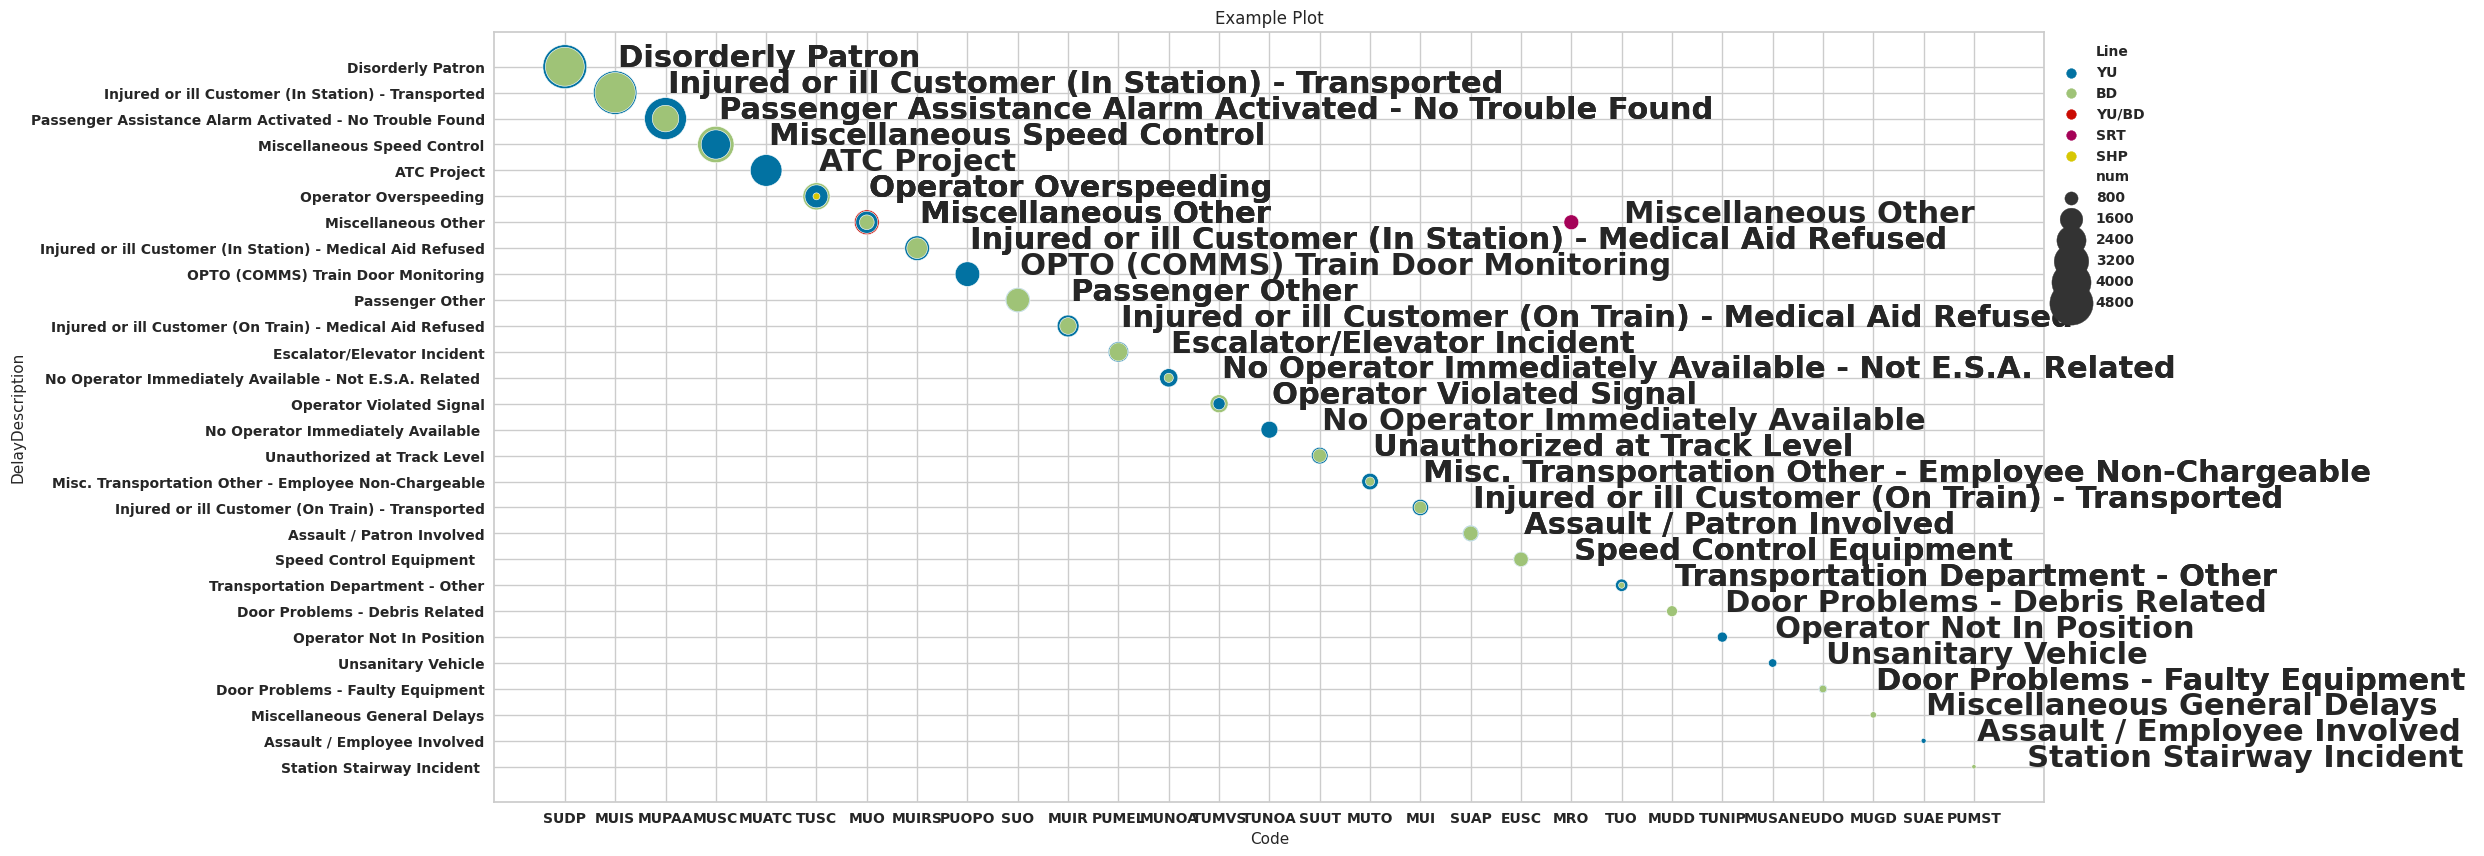

In [213]:
plt.figure(figsize=(20, 10))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df2['Code'], y=df2['DelayDescription'], hue=df2['Line'],size=df2['num'],data=df2, sizes=(10,1000))
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

def plotlabel(xvar, yvar, label):
        ax.text(xvar, yvar, '     ' + label)

df2.apply(lambda x: plotlabel(x['Code'],  x['DelayDescription'], x['DelayDescription']), axis=1)

plt.title('Example Plot')
plt.xlabel('Code')
plt.ylabel('DelayDescription');

In [214]:
df3=pd.DataFrame(ttc.groupby(['Delay Description','Min Delay', 'Line'])['Delay Description'].count())
df3=df3.rename(columns={'Delay Description': 'num'})
df3=df3.reset_index()

In [215]:
df3=df3.sort_values('num',ascending=False).head(200)

In [216]:
df4=df3[df3['Line'].isin(['YU', 'BD', 'SRT', 'SHP', 'YU/BD'])]
df4=df3[df3['Min Delay']> 0]
df4.rename(columns={"Delay Description" : "DelayDescription", "Min Delay": "MinDelay"}, inplace=True)
df4.dropna(inplace=True)

In [217]:
df4

DelayDescription  MinDelay Line  num
2162  Passenger Assistance Alarm Activated - No Trou...         3   YU  782
564                                   Disorderly Patron         3   YU  760
16                                          ATC Project         3   YU  652
1868                 No Operator Immediately Available          3   YU  646
1906  No Operator Immediately Available - Not E.S.A....         3   YU  613
...                                                 ...       ...  ...  ...
2093                           Operator Violated Signal         5   BD   68
1871                 No Operator Immediately Available          4   YU   68
758                    Door Problems - Faulty Equipment         4  SRT   67
2864                              Signals - Train Stops         3   BD   67
1943                 OPTO (COMMS) Train Door Monitoring         7   YU   67

[114 rows x 4 columns]

In [218]:
df4.shape

(114, 4)

In [219]:
plt.figure(figsize=(20, 10))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df4['MinDelay'], y=df4['DelayDescription'], hue=df4['Line'],size=df2['num'],data=df4, sizes=(50,100))
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

def plotlabel(xvar, yvar, label):
        ax.text(xvar, yvar, '     ' + label)

df4.apply(lambda x: plotlabel(x['MinDelay'],  x['DelayDescription'], x['DelayDescription']), axis=1)

plt.title('Plot of Delay Description, Minutes of Delay by TTC Line')
plt.xlabel('MinDelay')
plt.ylabel('DelayDescription')

Text(0, 0.5, 'DelayDescription')

ValueError: ignored

<Figure size 2000x1000 with 1 Axes>

In [220]:
plt.rcParams.update({'font.size': 22})

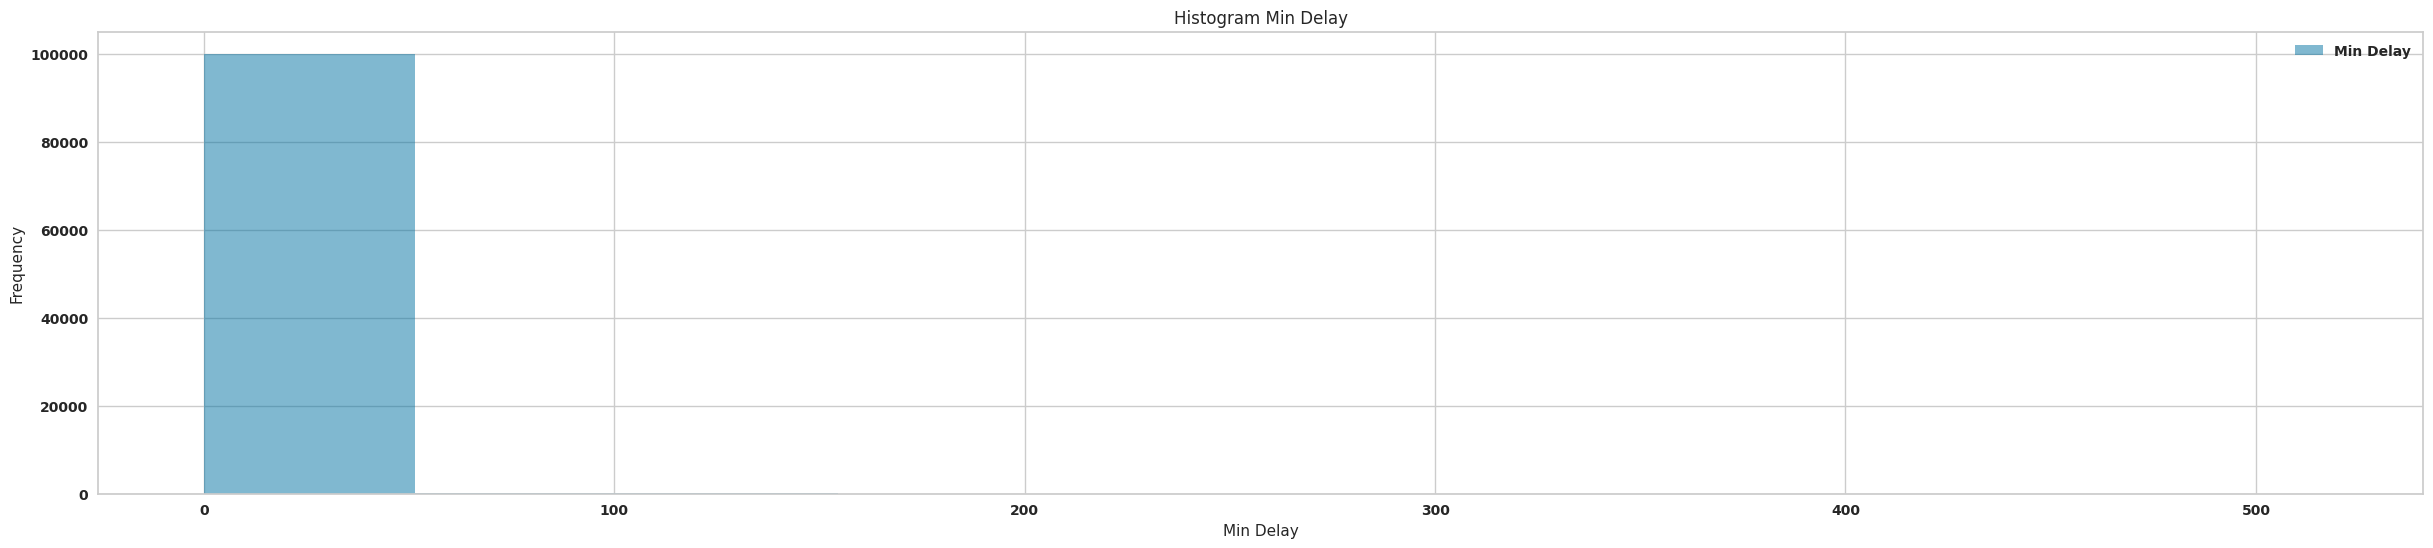

In [221]:
plt.hist(ttc['Min Delay'], bins=10, alpha=0.5, label='Min Delay')
plt.xlabel('Min Delay')
plt.ylabel('Frequency')
plt.title('Histogram Min Delay')
plt.legend()
plt.show();

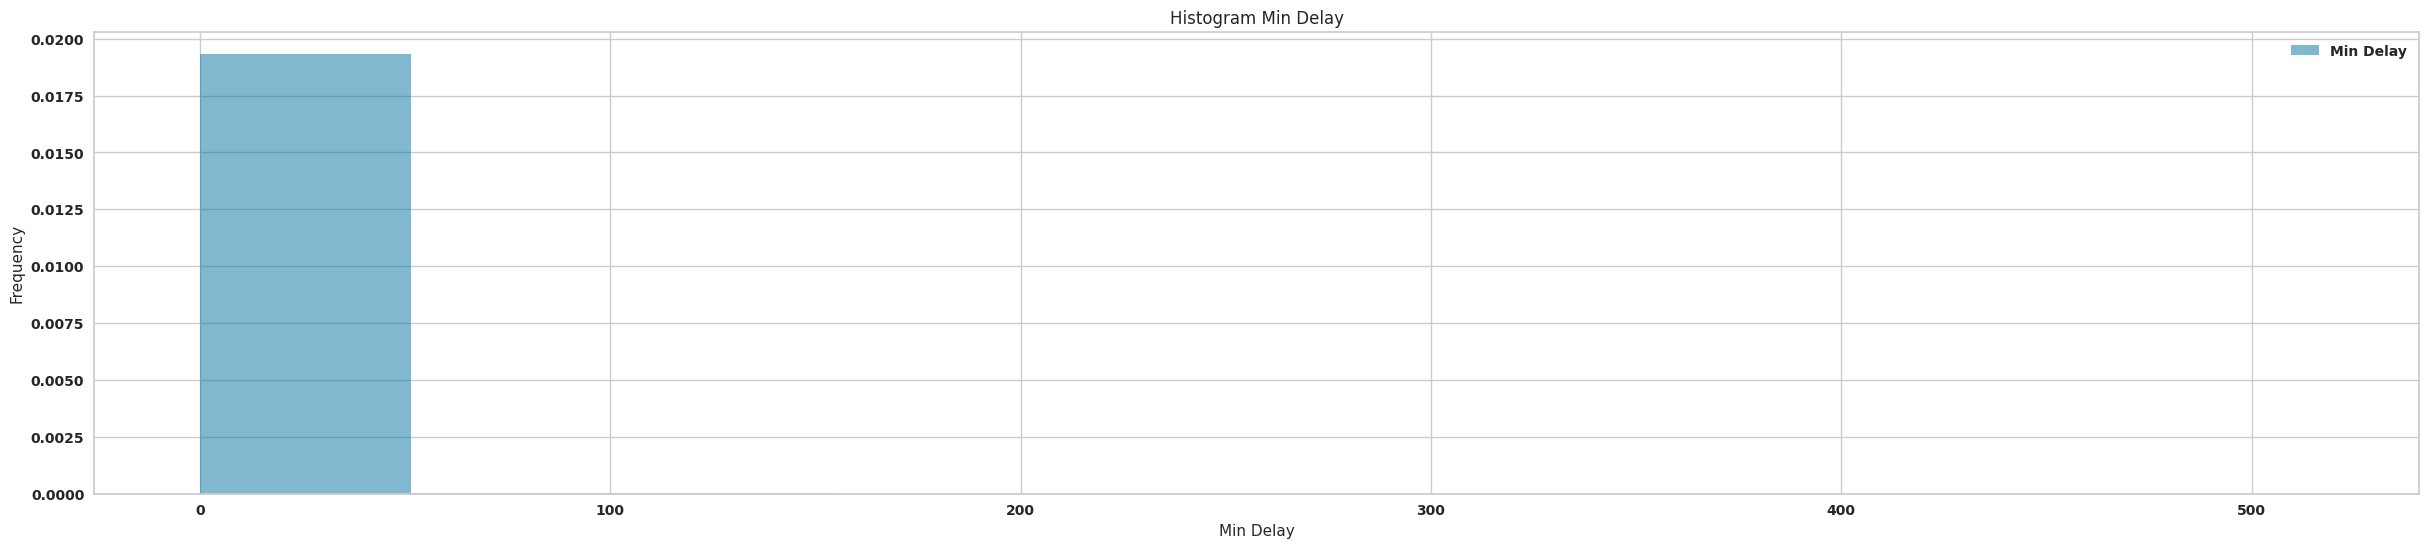

In [222]:
plt.hist(ttc['Min Delay'], bins=10, alpha=0.5, label='Min Delay', density=True)
plt.xlabel('Min Delay')
plt.ylabel('Frequency')
plt.title('Histogram Min Delay')
plt.legend()
plt.show();

In [223]:
ttc_mindelay = ttc.loc[ttc['Min Delay'] <20]


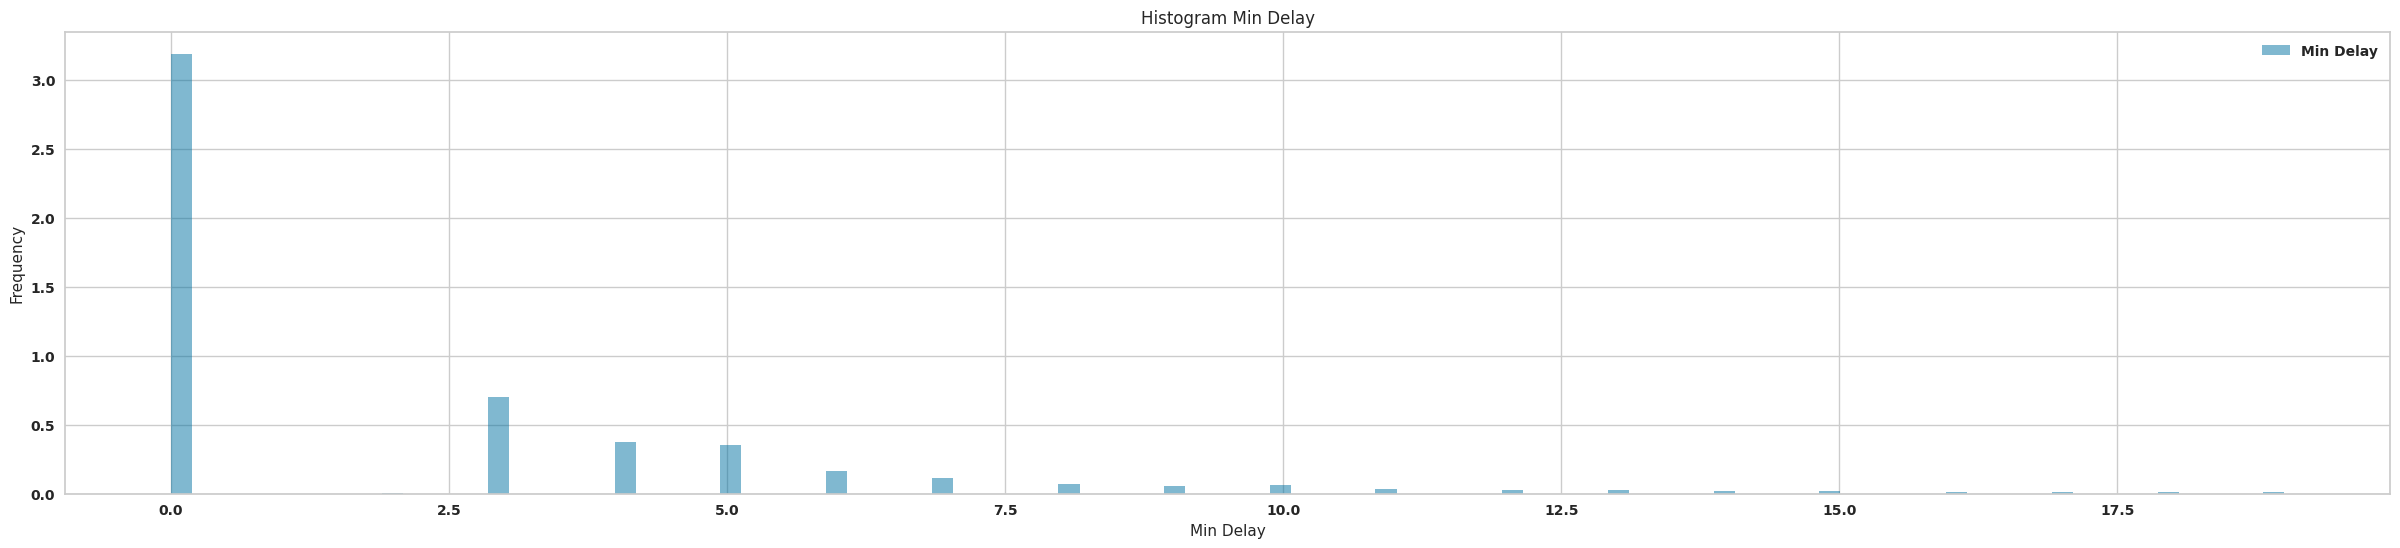

In [224]:
plt.hist(ttc_mindelay['Min Delay'], bins=100, alpha=0.5, label='Min Delay', density=True)
plt.xlabel('Min Delay')
plt.ylabel('Frequency')
plt.title('Histogram Min Delay')
plt.legend()
plt.show()

Most delays are up to 10 minutes. Analysis can focus on delays up to 10 minutes.

**Data Exploration: Min Delay and Min Gap Scatter Plot (linear correlation)**




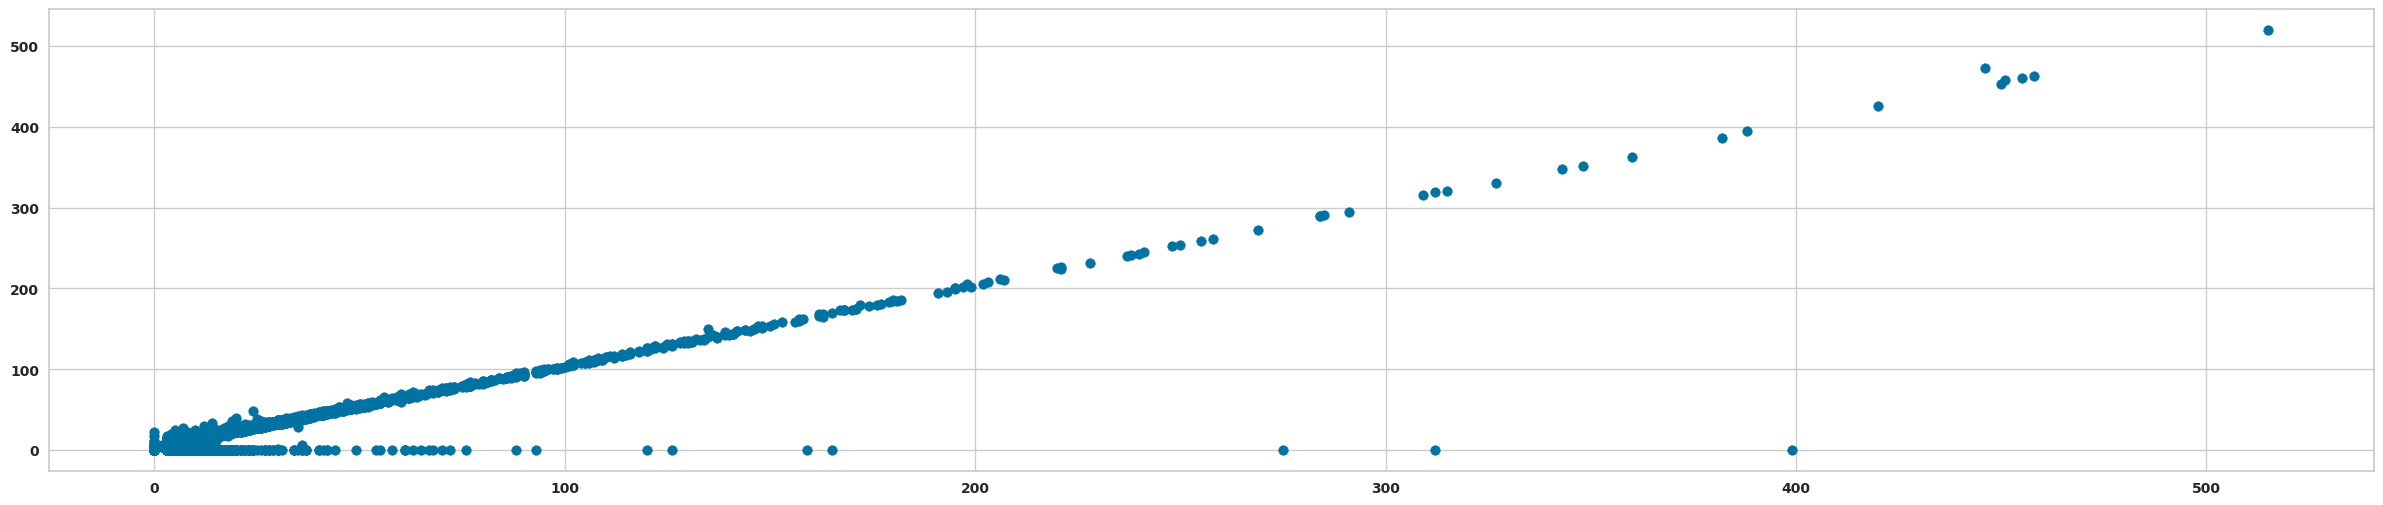

In [225]:
plt.scatter(ttc['Min Delay'], ttc['Min Gap'])



In [226]:
ttc_toplinesYU

Date                Time        Day                Station  \
0      2018-01-01 2023-07-18 00:29:00     Monday  SHEPPARD WEST STATION   
1      2018-01-01 2023-07-18 01:07:00     Monday         DUNDAS STATION   
2      2018-01-01 2023-07-18 01:22:00     Monday         MUSEUM STATION   
4      2018-01-01 2023-07-18 01:39:00     Monday         MUSEUM STATION   
7      2018-01-01 2023-07-18 02:32:00     Monday          UNION STATION   
...           ...                 ...        ...                    ...   
100539 2023-05-31 2023-07-18 19:14:00  Wednesday         DUNDAS STATION   
100546 2023-05-31 2023-07-18 22:01:00  Wednesday         DUPONT STATION   
100547 2023-05-31 2023-07-18 22:04:00  Wednesday          BLOOR STATION   
100554 2023-05-31 2023-07-18 01:02:00  Wednesday      ST ANDREW STATION   
100556 2023-05-31 2023-07-18 01:27:00  Wednesday      ST ANDREW STATION   

         Code  Min Delay  Min Gap Bound Line  Vehicle  \
0       MUATC         10       15     N   YU     5986   
1       MUNCA          0        0   NaN   YU        0   
2        MUSC          0        0     N   YU     5751   
4         MUO          6       11     S   YU     5781   
7        MUIS          0        0   NaN   YU        0   
...       ...        ...      ...   ...  ...      ...   
100539   MUIS          0        0   NaN   YU        0   
100546   SUDP          0        0     N   YU     5471   
100547  MUIRS          0        0     S   YU        0   
100554   SUDP          0        0     S   YU     5881   
100556    SUO          0        0     S   YU     5976   

                                        Delay Description  
0                                             ATC Project  
1                                                     NaN  
2                             Miscellaneous Speed Control  
4                                     Miscellaneous Other  
7       Injured or ill Customer (In Station) - Transpo...  
...                                                   ...  
100539  Injured or ill Customer (In Station) - Transpo...  
100546                                  Disorderly Patron  
100547  Injured or ill Customer (In Station) - Medical...  
100554                                  Disorderly Patron  
100556                                    Passenger Other  

[50920 rows x 11 columns]

# **Repeat Analysis with Min Delay in range 1-21 minutes**

The analysis below will focus on the most commonplace delays that range in 1-21 minutes based on the histogram of Min Delay

(there are many delays recorded with 0 minutes which are not relevant and longer delays which indicate special niche cases and potentially outliers)



In [227]:
ttc_YUdelays=ttc_toplinesYU[ttc_toplinesYU['Min Delay'].isin(range(1,21))]
ttc_YUdelays

Date                Time        Day                Station  \
0      2018-01-01 2023-07-18 00:29:00     Monday  SHEPPARD WEST STATION   
4      2018-01-01 2023-07-18 01:39:00     Monday         MUSEUM STATION   
8      2018-01-01 2023-07-18 02:42:00     Monday        COLLEGE STATION   
22     2018-01-01 2023-07-18 09:02:00     Monday     DAVISVILLE STATION   
34     2018-01-01 2023-07-18 15:49:00     Monday       EGLINTON STATION   
...           ...                 ...        ...                    ...   
100525 2023-05-31 2023-07-18 15:55:00  Wednesday         WILSON STATION   
100529 2023-05-31 2023-07-18 16:26:00  Wednesday          BLOOR STATION   
100530 2023-05-31 2023-07-18 16:34:00  Wednesday      WELLESLEY STATION   
100534 2023-05-31 2023-07-18 17:28:00  Wednesday       ST CLAIR STATION   
100537 2023-05-31 2023-07-18 18:15:00  Wednesday     VAUGHAN MC STATION   

         Code  Min Delay  Min Gap Bound Line  Vehicle  \
0       MUATC         10       15     N   YU     5986   
4         MUO          6       11     S   YU     5781   
8        SUDP          7       12     N   YU     5696   
22       PUSO          4        9     S   YU     5755   
34        TUO          6       10     S   YU     6061   
...       ...        ...      ...   ...  ...      ...   
100525   MUDD          7       10     S   YU     5411   
100529   MUIR          4        7     S   YU     5396   
100530  MUSAN          3        6     S   YU     5396   
100534  MUPAA          3        6     N   YU     5806   
100537  MUATC          3        6     S   YU     5651   

                                        Delay Description  
0                                             ATC Project  
4                                     Miscellaneous Other  
8                                       Disorderly Patron  
22                                 S/E/C Department Other  
34                      Transportation Department - Other  
...                                                   ...  
100525                     Door Problems - Debris Related  
100529  Injured or ill Customer (On Train) - Medical A...  
100530                                 Unsanitary Vehicle  
100534  Passenger Assistance Alarm Activated - No Trou...  
100537                                        ATC Project  

[21595 rows x 11 columns]

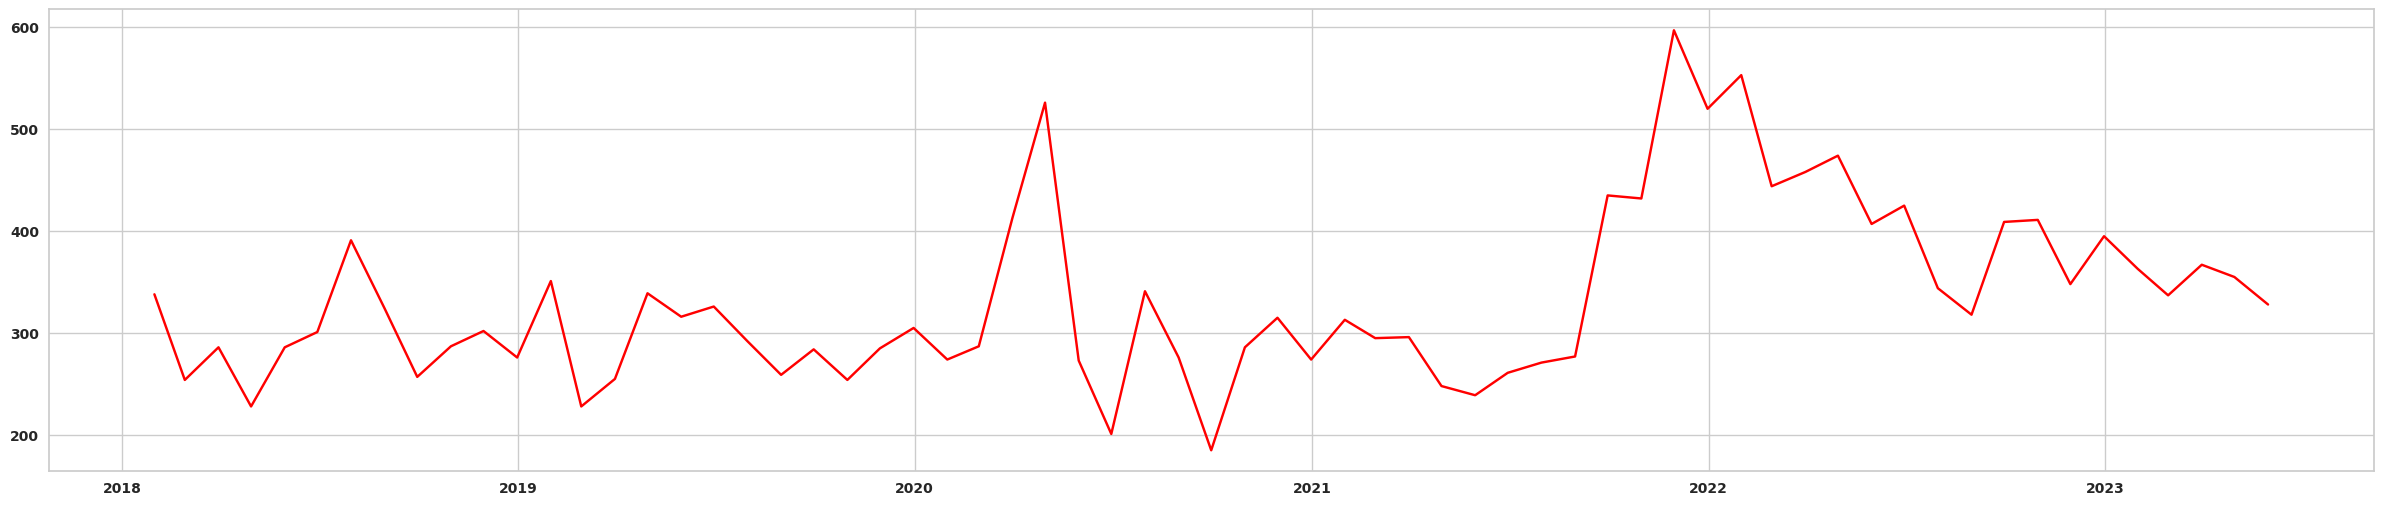

In [228]:
ttc_YUdelayscount = ttc_YUdelays.groupby('Date')['Time'].count()
ttc_YUdelayscount_monthly = aggregate_monthly(ttc_YUdelayscount)
plt.plot(ttc_YUdelayscount_monthly, color='red')


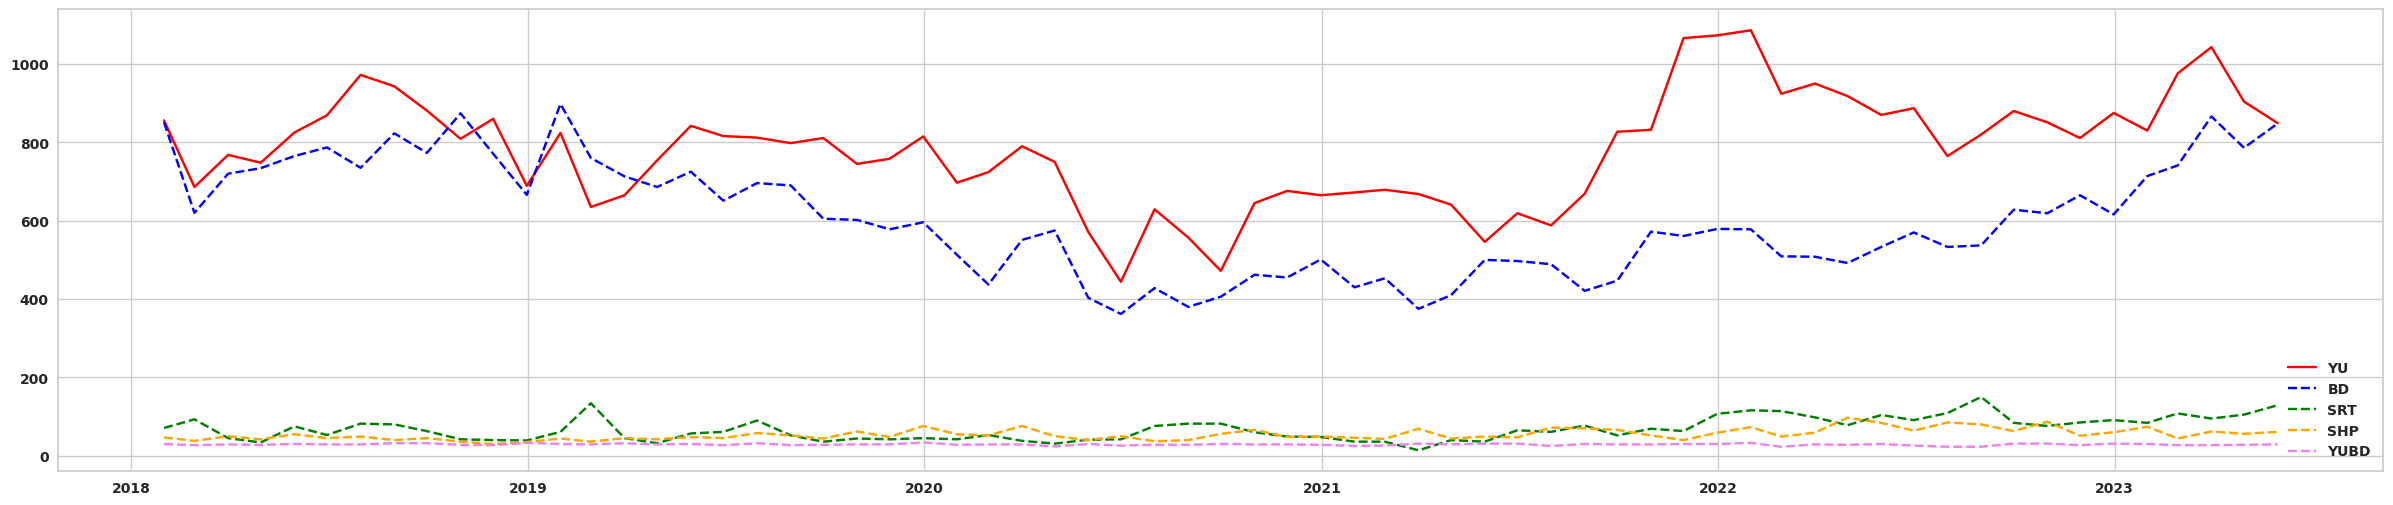

<Figure size 4000x1000 with 0 Axes>

In [229]:
ttc_toplinesYU= ttc[ttc['Line'].isin(['YU'])]
ttc_YUdelays=ttc_toplinesYU[ttc_toplinesYU['Min Delay'].isin(range(1,21))]
ttc_YUdelays = ttc_toplinesYU.groupby('Date')['Time'].count()
ttc_YUdelays_monthly = aggregate_monthly(ttc_YUdelays)

ttc_toplinesBD= ttc[ttc['Line'].isin(['BD'])]
ttc_BDdelays=ttc_toplinesBD[ttc_toplinesBD['Min Delay'].isin(range(1,21))]
ttc_BDdelays = ttc_toplinesBD.groupby('Date')['Time'].count()
ttc_BDdelays_monthly = aggregate_monthly(ttc_BDdelays)

ttc_toplinesSRT= ttc[ttc['Line'].isin(['SRT'])]
ttc_SRTdelays=ttc_toplinesSRT[ttc_toplinesSRT['Min Delay'].isin(range(1,21))]
ttc_SRTdelays = ttc_toplinesSRT.groupby('Date')['Time'].count()
ttc_SRTdelays_monthly = aggregate_monthly(ttc_SRTdelays)

ttc_toplinesSHP= ttc[ttc['Line'].isin(['SHP'])]
ttc_SHPdelays=ttc_toplinesSHP[ttc_toplinesSHP['Min Delay'].isin(range(1,21))]
ttc_SHPdelays = ttc_toplinesSHP.groupby('Date')['Time'].count()
ttc_SHPdelays_monthly = aggregate_monthly(ttc_SHPdelays)

ttc_toplinesYUBD= ttc[ttc['Line'].isin(['YU/BD'])]
ttc_YUBDdelays=ttc_toplinesYUBD[ttc_toplinesYUBD['Min Delay'].isin(range(1,21))]
ttc_YUBDdelays = ttc_toplinesYUBD.groupby('Date')['Time'].count()
ttc_YUBDdelays_monthly = aggregate_monthly(ttc_YUBDdelays)

plt.plot(ttc_YUdelays_monthly, color='red')
plt.plot(ttc_BDdelays_monthly, color = 'blue', linestyle='dashed')
plt.plot(ttc_SRTdelays_monthly, color = 'green', linestyle='dashed')
plt.plot(ttc_SHPdelays_monthly, color = 'orange', linestyle='dashed')
plt.plot(ttc_YUBDdelays_monthly, color = 'violet', linestyle='dashed')



plt.legend(["YU", "BD", "SRT", "SHP", "YUBD"], loc ="lower right")
plt.figure(figsize=(40,10))

plt.show()

In [230]:
ttc_YUdelays_monthly

DelaysCount
Date                   
2018-01-31          856
2018-02-28          686
2018-03-31          768
2018-04-30          748
2018-05-31          825
...                 ...
2023-01-31          830
2023-02-28          976
2023-03-31         1043
2023-04-30          904
2023-05-31          849

[65 rows x 1 columns]

ATC Related Delay Codes:

EUATC ATC RC&S Equipment

MUATC ATC Project

PUATC ATC Signals Other

TUATC ATC Operator Related

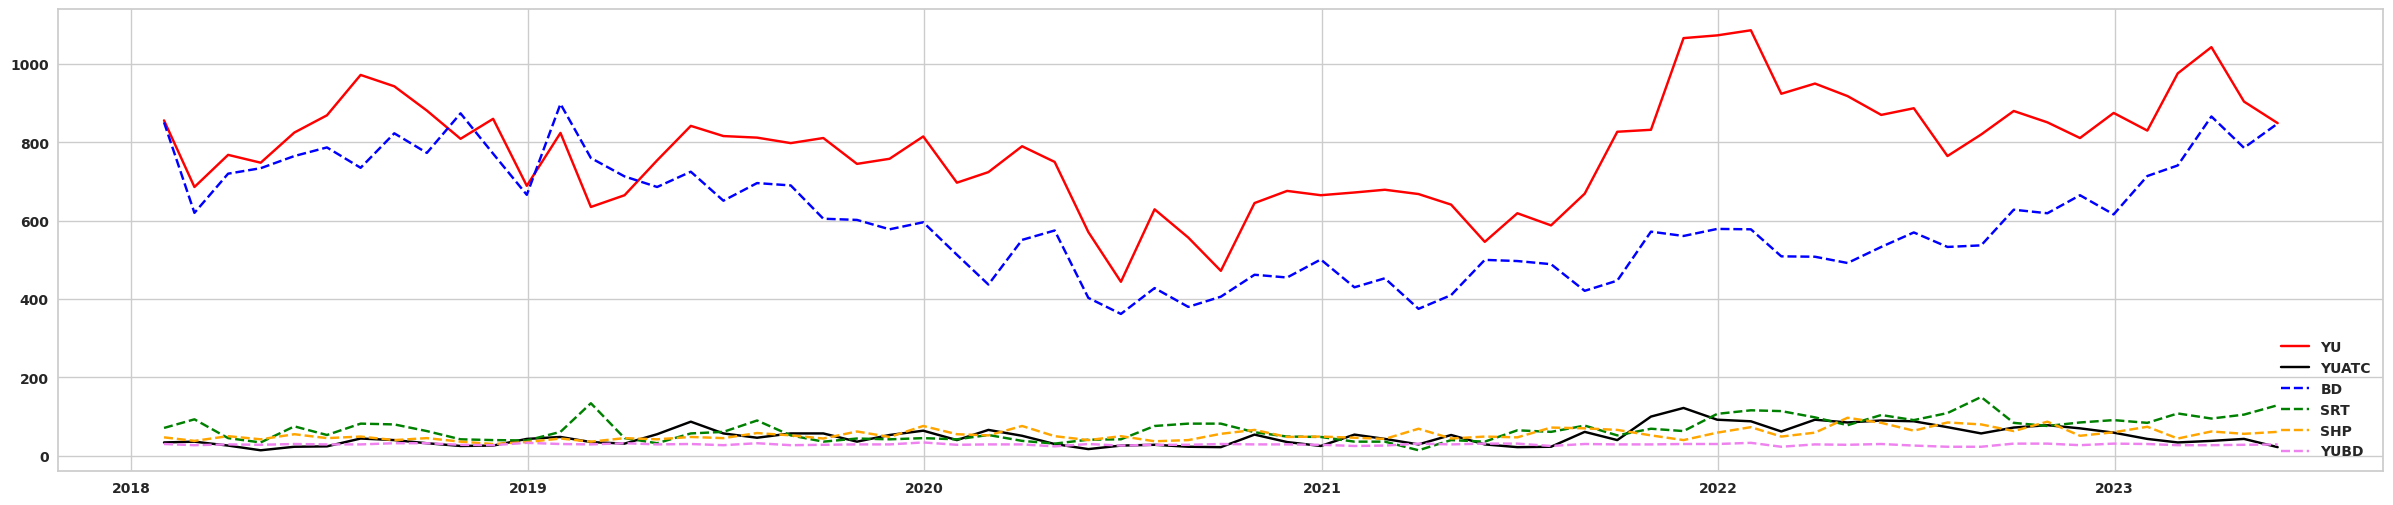

<Figure size 4000x1000 with 0 Axes>

In [231]:
ttc_toplinesYU= ttc[ttc['Line'].isin(['YU'])]
ttc_toplinesYUATC= ttc[ttc['Code'].isin(['EUATC', 'MUATC', 'PUATC', 'TUATC'])]
ttc_YUdelaysATC=ttc_toplinesYUATC[ttc_toplinesYUATC['Min Delay'].isin(range(1,21))]
ttc_YUATCdelays = ttc_toplinesYUATC.groupby('Date')['Time'].count()
ttc_YUATCdelays_monthly = aggregate_monthly(ttc_YUATCdelays)

ttc_toplinesYU= ttc[ttc['Line'].isin(['YU'])]
ttc_YUdelays=ttc_toplinesYU[ttc_toplinesYU['Min Delay'].isin(range(1,21))]
ttc_YUdelays = ttc_toplinesYU.groupby('Date')['Time'].count()
ttc_YUdelays_monthly = aggregate_monthly(ttc_YUdelays)

ttc_toplinesBD= ttc[ttc['Line'].isin(['BD'])]
ttc_BDdelays=ttc_toplinesBD[ttc_toplinesBD['Min Delay'].isin(range(1,21))]
ttc_BDdelays = ttc_toplinesBD.groupby('Date')['Time'].count()
ttc_BDdelays_monthly = aggregate_monthly(ttc_BDdelays)

ttc_toplinesSRT= ttc[ttc['Line'].isin(['SRT'])]
ttc_SRTdelays=ttc_toplinesSRT[ttc_toplinesSRT['Min Delay'].isin(range(1,21))]
ttc_SRTdelays = ttc_toplinesSRT.groupby('Date')['Time'].count()
ttc_SRTdelays_monthly = aggregate_monthly(ttc_SRTdelays)

ttc_toplinesSHP= ttc[ttc['Line'].isin(['SHP'])]
ttc_SHPdelays=ttc_toplinesSHP[ttc_toplinesSHP['Min Delay'].isin(range(1,21))]
ttc_SHPdelays = ttc_toplinesSHP.groupby('Date')['Time'].count()
ttc_SHPdelays_monthly = aggregate_monthly(ttc_SHPdelays)

ttc_toplinesYUBD= ttc[ttc['Line'].isin(['YU/BD'])]
ttc_YUBDdelays=ttc_toplinesYUBD[ttc_toplinesYUBD['Min Delay'].isin(range(1,21))]
ttc_YUBDdelays = ttc_toplinesYUBD.groupby('Date')['Time'].count()
ttc_YUBDdelays_monthly = aggregate_monthly(ttc_YUBDdelays)

plt.plot(ttc_YUdelays_monthly, color='red')
plt.plot(ttc_YUATCdelays_monthly, color='black')

plt.plot(ttc_BDdelays_monthly, color = 'blue', linestyle='dashed')
plt.plot(ttc_SRTdelays_monthly, color = 'green', linestyle='dashed')
plt.plot(ttc_SHPdelays_monthly, color = 'orange', linestyle='dashed')
plt.plot(ttc_YUBDdelays_monthly, color = 'violet', linestyle='dashed')



plt.legend(["YU", "YUATC", "BD", "SRT", "SHP", "YUBD"], loc ="lower right")
plt.figure(figsize=(40,10))

plt.show()

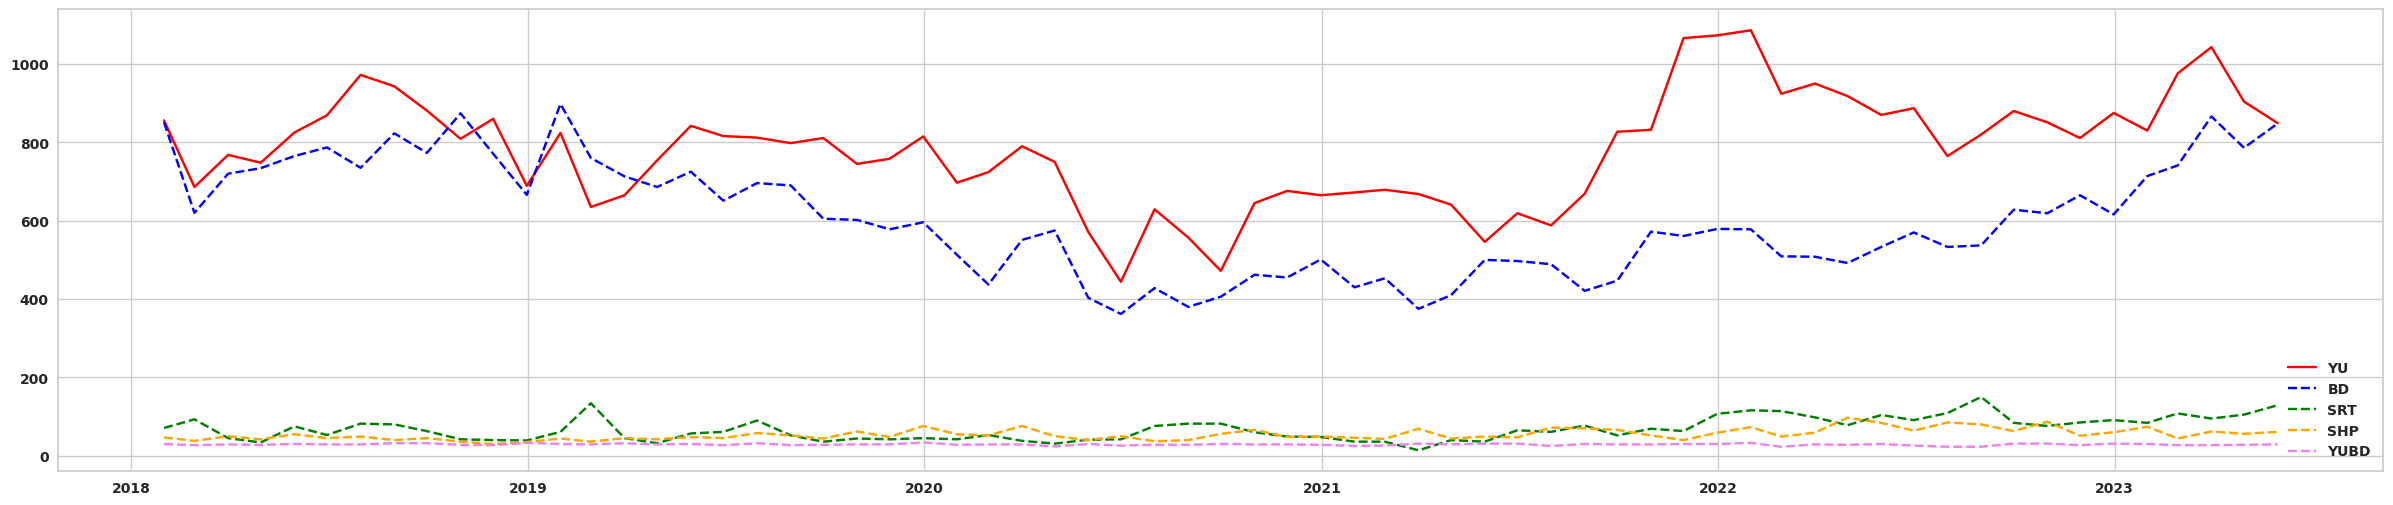

<Figure size 4000x1000 with 0 Axes>

In [232]:
ttc_toplinesYU= ttc[ttc['Line'].isin(['YU'])]
ttc_YUdelays=ttc_toplinesYU[ttc_toplinesYU['Min Delay'].isin(range(1,21))]
ttc_YUdelays = ttc_toplinesYU.groupby('Date')['Time'].count()
ttc_YUdelays_monthly = aggregate_monthly(ttc_YUdelays)

ttc_toplinesBD= ttc[ttc['Line'].isin(['BD'])]
ttc_BDdelays=ttc_toplinesBD[ttc_toplinesBD['Min Delay'].isin(range(1,21))]
ttc_BDdelays = ttc_toplinesBD.groupby('Date')['Time'].count()
ttc_BDdelays_monthly = aggregate_monthly(ttc_BDdelays)

ttc_toplinesSRT= ttc[ttc['Line'].isin(['SRT'])]
ttc_SRTdelays=ttc_toplinesSRT[ttc_toplinesSRT['Min Delay'].isin(range(1,21))]
ttc_SRTdelays = ttc_toplinesSRT.groupby('Date')['Time'].count()
ttc_SRTdelays_monthly = aggregate_monthly(ttc_SRTdelays)

ttc_toplinesSHP= ttc[ttc['Line'].isin(['SHP'])]
ttc_SHPdelays=ttc_toplinesSHP[ttc_toplinesSHP['Min Delay'].isin(range(1,21))]
ttc_SHPdelays = ttc_toplinesSHP.groupby('Date')['Time'].count()
ttc_SHPdelays_monthly = aggregate_monthly(ttc_SHPdelays)

ttc_toplinesYUBD= ttc[ttc['Line'].isin(['YU/BD'])]
ttc_YUBDdelays=ttc_toplinesYUBD[ttc_toplinesYUBD['Min Delay'].isin(range(1,21))]
ttc_YUBDdelays = ttc_toplinesYUBD.groupby('Date')['Time'].count()
ttc_YUBDdelays_monthly = aggregate_monthly(ttc_YUBDdelays)

plt.plot(ttc_YUdelays_monthly, color='red')
plt.plot(ttc_BDdelays_monthly, color = 'blue', linestyle='dashed')
plt.plot(ttc_SRTdelays_monthly, color = 'green', linestyle='dashed')
plt.plot(ttc_SHPdelays_monthly, color = 'orange', linestyle='dashed')
plt.plot(ttc_YUBDdelays_monthly, color = 'violet', linestyle='dashed')



plt.legend(["YU", "BD", "SRT", "SHP", "YUBD"], loc ="lower right")
plt.figure(figsize=(40,10))

plt.show()

In [233]:
list_toplines = [ttc_YUdelays_monthly, ttc_BDdelays_monthly, ttc_SRTdelays_monthly, ttc_SHPdelays_monthly, ttc_YUBDdelays_monthly]

df_toplines = pd.concat(list_toplines, axis=1)
df_toplines.columns = ['YU', 'BD', 'SRT', 'SHP', 'YUBD']
print(df_toplines.shape)
df_toplines.head()


(65, 5)


YU   BD  SRT  SHP  YUBD
Date                                
2018-01-31  856  851   71   47    30
2018-02-28  686  620   93   38    27
2018-03-31  768  720   45   50    29
2018-04-30  748  734   34   42    28
2018-05-31  825  765   75   55    30

TOTAL

In [234]:
df_toplines['Total'] = df_toplines['YU'] + df_toplines['BD']+ df_toplines['SRT']+ df_toplines['SHP']+ df_toplines['YUBD']

In [235]:
df_toplines

YU   BD  SRT  SHP  YUBD  Total
Date                                        
2018-01-31   856  851   71   47    30   1855
2018-02-28   686  620   93   38    27   1464
2018-03-31   768  720   45   50    29   1612
2018-04-30   748  734   34   42    28   1586
2018-05-31   825  765   75   55    30   1750
...          ...  ...  ...  ...   ...    ...
2023-01-31   830  714   84   74    30   1732
2023-02-28   976  741  108   44    27   1896
2023-03-31  1043  866   95   62    27   2093
2023-04-30   904  786  105   56    28   1879
2023-05-31   849  848  129   61    29   1916

[65 rows x 6 columns]

**Calculate Percentage of Delays Count by Line**

(for top 5 lines only, total delays count is the sum of the 5 lines)

In [236]:
df_toplines['YU_pct'] = 100*(df_toplines['YU'])/(df_toplines['Total'])
df_toplines['BD_pct'] = 100*(df_toplines['BD'])/(df_toplines['Total'])
df_toplines['SRT_pct'] = 100*(df_toplines['SRT'])/(df_toplines['Total'])
df_toplines['SHP_pct'] = 100*(df_toplines['SHP'])/(df_toplines['Total'])
df_toplines['YUBD_pct'] = 100*(df_toplines['YUBD'])/(df_toplines['Total'])

In [237]:
df_toplines

YU   BD  SRT  SHP  YUBD  Total     YU_pct     BD_pct   SRT_pct  \
Date                                                                           
2018-01-31   856  851   71   47    30   1855  46.145553  45.876011  3.827493   
2018-02-28   686  620   93   38    27   1464  46.857923  42.349727  6.352459   
2018-03-31   768  720   45   50    29   1612  47.642680  44.665012  2.791563   
2018-04-30   748  734   34   42    28   1586  47.162673  46.279950  2.143758   
2018-05-31   825  765   75   55    30   1750  47.142857  43.714286  4.285714   
...          ...  ...  ...  ...   ...    ...        ...        ...       ...   
2023-01-31   830  714   84   74    30   1732  47.921478  41.224018  4.849885   
2023-02-28   976  741  108   44    27   1896  51.476793  39.082278  5.696203   
2023-03-31  1043  866   95   62    27   2093  49.832776  41.376015  4.538939   
2023-04-30   904  786  105   56    28   1879  48.110697  41.830761  5.588079   
2023-05-31   849  848  129   61    29   1916  44.311065  44.258873  6.732777   

             SHP_pct  YUBD_pct  
Date                            
2018-01-31  2.533693  1.617251  
2018-02-28  2.595628  1.844262  
2018-03-31  3.101737  1.799007  
2018-04-30  2.648172  1.765448  
2018-05-31  3.142857  1.714286  
...              ...       ...  
2023-01-31  4.272517  1.732102  
2023-02-28  2.320675  1.424051  
2023-03-31  2.962255  1.290014  
2023-04-30  2.980309  1.490154  
2023-05-31  3.183716  1.513570  

[65 rows x 11 columns]

In [238]:
df_toplines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2018-01-31 to 2023-05-31
Freq: M
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YU        65 non-null     int64  
 1   BD        65 non-null     int64  
 2   SRT       65 non-null     int64  
 3   SHP       65 non-null     int64  
 4   YUBD      65 non-null     int64  
 5   Total     65 non-null     int64  
 6   YU_pct    65 non-null     float64
 7   BD_pct    65 non-null     float64
 8   SRT_pct   65 non-null     float64
 9   SHP_pct   65 non-null     float64
 10  YUBD_pct  65 non-null     float64
dtypes: float64(5), int64(6)
memory usage: 6.1 KB


In [239]:
df_toplines.index

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
      

In [240]:
def aggregate_yearly(df):

  df_yearly = pd.DataFrame(df)

  df_yearly.index=pd.to_datetime(df_yearly.index)
  df_yearly = df_yearly.resample('Y').mean()
  return df_yearly

In [241]:
df_toplines_yearly = aggregate_yearly(df_toplines)
df_toplines_yearly

YU          BD         SRT        SHP       YUBD  \
Date                                                                   
2018-12-31  825.500000  759.916667   59.750000  42.666667  29.500000   
2019-12-31  772.916667  683.333333   58.250000  50.000000  29.666667   
2020-12-31  635.000000  456.083333   53.666667  51.583333  28.166667   
2021-12-31  740.000000  477.833333   54.666667  54.750000  28.833333   
2022-12-31  886.416667  565.666667   99.666667  71.000000  27.916667   
2023-12-31  920.400000  791.000000  104.200000  59.400000  28.200000   

                  Total     YU_pct     BD_pct   SRT_pct   SHP_pct  YUBD_pct  
Date                                                                         
2018-12-31  1717.333333  48.011864  44.284633  3.481531  2.492226  1.729746  
2019-12-31  1594.166667  48.574887  42.772241  3.630143  3.154435  1.868294  
2020-12-31  1224.500000  51.645571  37.245332  4.532420  4.234747  2.341930  
2021-12-31  1356.083333  54.184507  35.551801  3.940090  4.148810  2.174792  
2022-12-31  1650.666667  53.643387  34.295377  6.053877  4.319281  1.688079  
2023-12-31  1903.200000  48.330562  41.554389  5.481176  3.143894  1.489978

In [242]:
df_toplines_yearly['Year'] = df_toplines_yearly.index.year
df_toplines_yearly

YU          BD         SRT        SHP       YUBD  \
Date                                                                   
2018-12-31  825.500000  759.916667   59.750000  42.666667  29.500000   
2019-12-31  772.916667  683.333333   58.250000  50.000000  29.666667   
2020-12-31  635.000000  456.083333   53.666667  51.583333  28.166667   
2021-12-31  740.000000  477.833333   54.666667  54.750000  28.833333   
2022-12-31  886.416667  565.666667   99.666667  71.000000  27.916667   
2023-12-31  920.400000  791.000000  104.200000  59.400000  28.200000   

                  Total     YU_pct     BD_pct   SRT_pct   SHP_pct  YUBD_pct  \
Date                                                                          
2018-12-31  1717.333333  48.011864  44.284633  3.481531  2.492226  1.729746   
2019-12-31  1594.166667  48.574887  42.772241  3.630143  3.154435  1.868294   
2020-12-31  1224.500000  51.645571  37.245332  4.532420  4.234747  2.341930   
2021-12-31  1356.083333  54.184507  35.551801  3.940090  4.148810  2.174792   
2022-12-31  1650.666667  53.643387  34.295377  6.053877  4.319281  1.688079   
2023-12-31  1903.200000  48.330562  41.554389  5.481176  3.143894  1.489978   

            Year  
Date              
2018-12-31  2018  
2019-12-31  2019  
2020-12-31  2020  
2021-12-31  2021  
2022-12-31  2022  
2023-12-31  2023

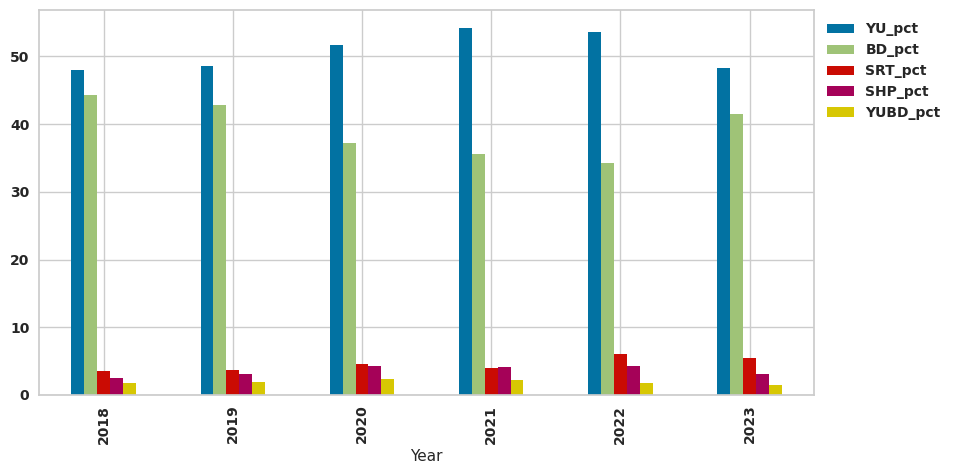

In [243]:
data=df_toplines_yearly.plot(
        x='Year',
        y=['YU_pct','BD_pct', 'SRT_pct', 'SHP_pct', 'YUBD_pct'],
        kind='bar',
        figsize=(10,5)).legend( bbox_to_anchor =(1 ,1)
       )


Add Labels to Barplot

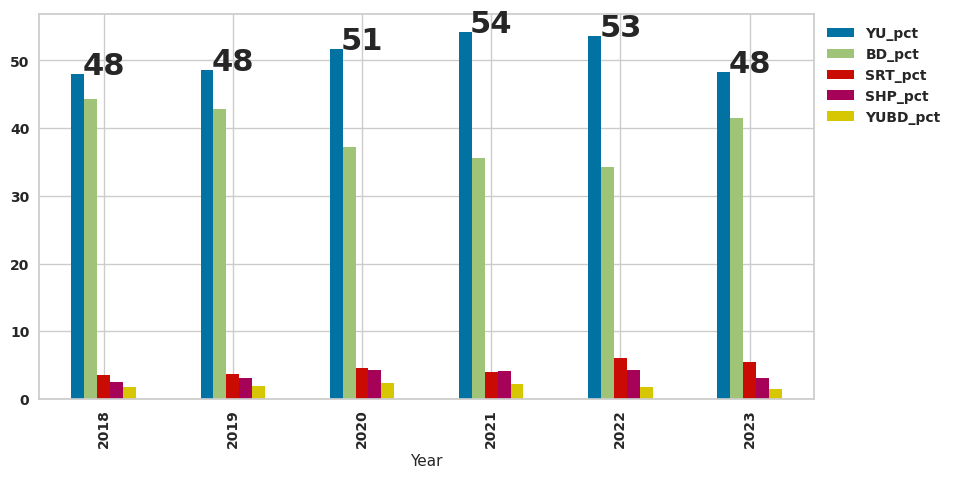

In [244]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], int(y[i]), ha = 'center')

data=df_toplines_yearly.plot(
        x='Year',
        y=['YU_pct','BD_pct', 'SRT_pct', 'SHP_pct', 'YUBD_pct'],
        kind='bar',
        figsize=(10,5)).legend( bbox_to_anchor =(1 ,1)
       )

addlabels(df_toplines_yearly['Year'], df_toplines_yearly['YU_pct'])
plt.show()


#x='Year'

#y=['YU_pct','BD_pct', 'SRT_pct', 'SHP_pct', 'YUBD_pct']

#addlabels(x, y)

In [245]:
df_toplines_yearlyint= df_toplines_yearly.copy()

df_toplines_yearlyint = df_toplines_yearlyint.astype({"YU_pct":"int","BD_pct":"int","SRT_pct":"int","SHP_pct":"int","YUBD_pct":"int"})
df_toplines_yearlyint


YU          BD         SRT        SHP       YUBD  \
Date                                                                   
2018-12-31  825.500000  759.916667   59.750000  42.666667  29.500000   
2019-12-31  772.916667  683.333333   58.250000  50.000000  29.666667   
2020-12-31  635.000000  456.083333   53.666667  51.583333  28.166667   
2021-12-31  740.000000  477.833333   54.666667  54.750000  28.833333   
2022-12-31  886.416667  565.666667   99.666667  71.000000  27.916667   
2023-12-31  920.400000  791.000000  104.200000  59.400000  28.200000   

                  Total  YU_pct  BD_pct  SRT_pct  SHP_pct  YUBD_pct  Year  
Date                                                                       
2018-12-31  1717.333333      48      44        3        2         1  2018  
2019-12-31  1594.166667      48      42        3        3         1  2019  
2020-12-31  1224.500000      51      37        4        4         2  2020  
2021-12-31  1356.083333      54      35        3        4         2  2021  
2022-12-31  1650.666667      53      34        6        4         1  2022  
2023-12-31  1903.200000      48      41        5        3         1  2023

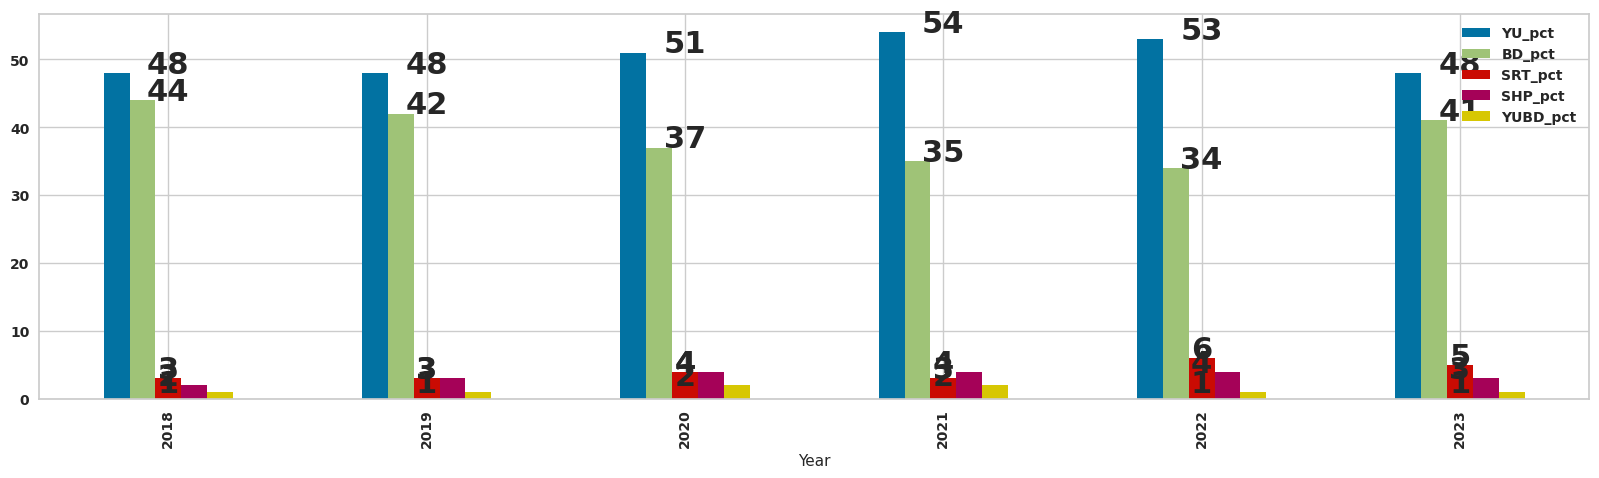

In [246]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], int(y[i]), ha = 'center')

data=df_toplines_yearlyint.plot(
        x='Year',
        y=['YU_pct','BD_pct', 'SRT_pct', 'SHP_pct', 'YUBD_pct'],
        kind='bar',
        figsize=(20,5)).legend( bbox_to_anchor =(1 ,1)
       )

addlabels(df_toplines_yearlyint['Year'], df_toplines_yearlyint['YU_pct'])
addlabels(df_toplines_yearlyint['Year'], df_toplines_yearlyint['BD_pct'])
addlabels(df_toplines_yearlyint['Year'], df_toplines_yearlyint['SRT_pct'])
addlabels(df_toplines_yearlyint['Year'], df_toplines_yearlyint['SHP_pct'])
addlabels(df_toplines_yearlyint['Year'], df_toplines_yearlyint['YUBD_pct'])
plt.show()